# Google Data Analytics Capstone - Cyclistic Data Analysis using Python - by prtpl

<img src="https://images.pexels.com/photos/1119162/pexels-photo-1119162.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" width="1000px">
<!-- ![](https://images.pexels.com/photos/1119162/pexels-photo-1119162.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1) -->
Photo by Brett Sayles: https://www.pexels.com/photo/grayscale-photo-of-man-riding-bicycle-on-street-1119162/

# Introduction

Hi, This is PRTPL. This is the first notebook I have ever created on Kaggle. I am going to use this notebook to do some analysis of the [Google Data Analytics Capstone - Case Study 1](https://www.coursera.org/learn/google-data-analytics-capstone). I am going to use these six steps: Ask, Prepare, Process, Analyze, Share & Act for the analysis.

# Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

# Characters and teams

* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.
* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

# About the company

* In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
* Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
* Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.
* Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

# Ask

### Guiding questions

* What is the problem you are trying to solve?

    Maximize the number of annual memberships for company's future success.
* How can your insights drive business decisions?

    By identifying how the casual riders and member riders use the Cyclistic bikes differently.

### Key tasks

1. Identify the business task
* Identify the key difference between the usage patterns of Causal riders and Member riders and to convert the maximum number of Casual riders to Member riders for company's future success.
2. Consider key stakeholders
* Lily Moreno, Cyclistic Marketing Analytics Team, Cyclistic Executive Team

# Prepare

### Guiding questions

* Where is your data located?

    Google provided the data via [this link](https://divvy-tripdata.s3.amazonaws.com/index.html).
* How is the data organized?

    Data is stored in CSV files in the monthly zip files.
* Are there issues with bias or credibility in this data? Does your data ROCCC?

    No issues with bias or credibility as the data must be measured automatically by sensors, gps, etc. Yes it ROCCC.
* How are you addressing licensing, privacy, security, and accessibility?

    The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). And the data does not contain any personal information of the riders.
* How did you verify the data’s integrity?

    All the monthly CSV files were consistent.
* How does it help you answer your question?
    
    Data might have some hidden interesting patterns and trends that might help achive the business goal.
* Are there any problems with the data?

    It would have been super helpful if there was a Unique Identifier to identify a user. That would have helped to find out the frequency of the user using the Cyclistic bikes.

### Key tasks

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

#### Importing the required libraries for the cleaning and analysis

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as tkr
formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
sns.set_style('whitegrid')
plot_color = 'Blues'

#### I have downloaded and extracted all the zip files in the "Data" folder

In [2]:
directory = 'Data'

#### I have used the OS library to find the folders that has the '2022' in it's name and read the csv file under it as a dataframe. These dataframes are then appended to the dfs list.

In [4]:
year = '2022'
dfs  = []
for folder_name in os.listdir(directory):
    if '.zip' not in folder_name and year in folder_name:
        sub = os.path.join(directory, folder_name)
        for root, dirs, files in os.walk(sub):
            for file_name in files:
                if 'csv' in file_name and '._' not in file_name:
                    tdf = pd.read_csv(os.path.join(root, file_name))
                    dfs.append(tdf)

#### Using the Concat function of Pandas library to combine the list of DataFrames into a single DataFrame

In [5]:
data_2022 = pd.concat(dfs)

#### Quickly checking if the dataframes are concatenated properly using the head function that displays first 5 rows of the DataFrame

In [6]:
data_2022.head()

ride_id  rideable_type           started_at             ended_at  \
0  C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47  2022-01-13 12:02:44   
1  A6CF8980A652D272  electric_bike  2022-01-10 08:41:56  2022-01-10 08:46:17   
2  BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40  2022-01-25 04:58:01   
3  CBB80ED419105406   classic_bike  2022-01-04 00:18:04  2022-01-04 00:33:00   
4  DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10  2022-01-20 01:37:12   

              start_station_name start_station_id  \
0       Glenwood Ave & Touhy Ave              525   
1       Glenwood Ave & Touhy Ave              525   
2  Sheffield Ave & Fullerton Ave     TA1306000016   
3       Clark St & Bryn Mawr Ave     KA1504000151   
4    Michigan Ave & Jackson Blvd     TA1309000002   

                end_station_name end_station_id  start_lat  start_lng  \
0           Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1           Clark St & Touhy Ave         RP-007  42.012763 -87.665967   
2  Greenview Ave & Fullerton Ave   TA1307000001  41.925602 -87.653708   
3      Paulina St & Montrose Ave   TA1309000021  41.983593 -87.669154   
4         State St & Randolph St   TA1305000029  41.877850 -87.624080   

     end_lat    end_lng member_casual  
0  42.012560 -87.674367        casual  
1  42.012560 -87.674367        casual  
2  41.925330 -87.665800        member  
3  41.961507 -87.671387        casual  
4  41.884621 -87.627834        member

####  Looks good. Moving to the next step

# Process

### Guiding questions

* What tools are you choosing and why?

    I have used Python Programming Language for the analysis because it has all the libraries that are required for the analysis.
* Have you ensured your data’s integrity?

    Yes
* What steps have you taken to ensure that your data is clean?

    Checked if there are any null/NA values and if there are any unnecessary columns.
* How can you verify that your data is clean and ready to analyze?

    By Combining all the monthly csv files and using the describe function of the pandas library
* Have you documented your cleaning process so you can review and share those results?

    Yes

# Quickly examining the data

In [6]:
data_2022.head()

ride_id  rideable_type           started_at             ended_at  \
0  C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47  2022-01-13 12:02:44   
1  A6CF8980A652D272  electric_bike  2022-01-10 08:41:56  2022-01-10 08:46:17   
2  BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40  2022-01-25 04:58:01   
3  CBB80ED419105406   classic_bike  2022-01-04 00:18:04  2022-01-04 00:33:00   
4  DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10  2022-01-20 01:37:12   

              start_station_name start_station_id  \
0       Glenwood Ave & Touhy Ave              525   
1       Glenwood Ave & Touhy Ave              525   
2  Sheffield Ave & Fullerton Ave     TA1306000016   
3       Clark St & Bryn Mawr Ave     KA1504000151   
4    Michigan Ave & Jackson Blvd     TA1309000002   

                end_station_name end_station_id  start_lat  start_lng  \
0           Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1           Clark St & Touhy Ave         RP-007  42.012763 -87.665967   
2  Greenview Ave & Fullerton Ave   TA1307000001  41.925602 -87.653708   
3      Paulina St & Montrose Ave   TA1309000021  41.983593 -87.669154   
4         State St & Randolph St   TA1305000029  41.877850 -87.624080   

     end_lat    end_lng member_casual  
0  42.012560 -87.674367        casual  
1  42.012560 -87.674367        casual  
2  41.925330 -87.665800        member  
3  41.961507 -87.671387        casual  
4  41.884621 -87.627834        member

#### Checking if there are any duplicates

In [8]:
data_2022[data_2022.duplicated()]

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []

#### Checking all the columns names by "columns" attribute

In [7]:
data_2022.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

#### To check the number of rows and columns we will use the "shape" attribute

In [8]:
data_2022.shape

(5667717, 13)

#### To know more about our columns lets use the "info" function. It will give us the datatypes of the columns

In [9]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>



Int64Index: 5667717 entries, 0 to 181805



Data columns (total 13 columns):



 #   Column              Dtype  



---  ------              -----  



 0   ride_id             object 



 1   rideable_type       object 



 2   started_at          object 



 3   ended_at            object 



 4   start_station_name  object 



 5   start_station_id    object 



 6   end_station_name    object 



 7   end_station_id      object 



 8   start_lat           float64



 9   start_lng           float64



 10  end_lat             float64



 11  end_lng             float64



 12  member_casual       object 



dtypes: float64(4), object(9)



memory usage: 605.4+ MB


#### Finding the numerical and categorical columns. If the dtype is "O" then add it to the categorical_columns list else add it to the numerical_columns list

In [10]:
categorical_columns = []
numerical_columns   = []
for col in data_2022.columns:
    if data_2022[col].dtype == 'O':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [11]:
categorical_columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'member_casual']

In [12]:
numerical_columns

['start_lat', 'start_lng', 'end_lat', 'end_lng']

#### Using the describe function on the numerical columns to see the statistics like standard deviation, mean, median, mode etc

In [13]:
data_2022[numerical_columns].describe()

start_lat     start_lng       end_lat       end_lng
count  5.667717e+06  5.667717e+06  5.661859e+06  5.661859e+06
mean   4.190222e+01 -8.764783e+01  4.190242e+01 -8.764790e+01
std    4.626109e-02  2.999925e-02  6.805821e-02  1.082985e-01
min    4.164000e+01 -8.784000e+01  0.000000e+00 -8.814000e+01
25%    4.188103e+01 -8.766154e+01  4.188103e+01 -8.766260e+01
50%    4.190000e+01 -8.764410e+01  4.190000e+01 -8.764414e+01
75%    4.193000e+01 -8.762957e+01  4.193000e+01 -8.762963e+01
max    4.563503e+01 -7.379648e+01  4.237000e+01  0.000000e+00

#### In this case using the describe function on the numerical column is not so useful as the numerical columns are the nothing but coordinates

#### Using the describe function on the categorical columns
###### Note: The T in the end is for transpose

In [14]:
data_2022[categorical_columns].describe().T

count   unique                      top     freq
ride_id             5667717  5667717         C2F7DD78E82EC875        1
rideable_type       5667717        3            electric_bike  2889029
started_at          5667717  4745862      2022-05-30 13:05:15        9
ended_at            5667717  4758633      2022-08-22 12:47:49       20
start_station_name  4834653     1674  Streeter Dr & Grand Ave    75237
start_station_id    4834653     1313                    13022    75237
end_station_name    4774975     1692  Streeter Dr & Grand Ave    75382
end_station_id      4774975     1317                    13022    75382
member_casual       5667717        2                   member  3345685

#### Insights:
* Number of non null values in the columns
* Number of unique values in the columns
* Most repeated value and its frequency

#### Finding the number of null/NA values in the columns

In [15]:
data_2022.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

#### In our case there is no way to find these missing values. So I am going to ignore it.
###### Please correct me if I am wrong here

#### Using the info function once again

In [16]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>



Int64Index: 5667717 entries, 0 to 181805



Data columns (total 13 columns):



 #   Column              Dtype  



---  ------              -----  



 0   ride_id             object 



 1   rideable_type       object 



 2   started_at          object 



 3   ended_at            object 



 4   start_station_name  object 



 5   start_station_id    object 



 6   end_station_name    object 



 7   end_station_id      object 



 8   start_lat           float64



 9   start_lng           float64



 10  end_lat             float64



 11  end_lng             float64



 12  member_casual       object 



dtypes: float64(4), object(9)



memory usage: 605.4+ MB


####  "started_at" and "ended_at" columns are of dtype "object". Converting it to DateTime using the pandas.to_datetime function.

In [17]:
data_2022['started_at'] = pd.to_datetime(data_2022['started_at'])
data_2022['ended_at']   = pd.to_datetime(data_2022['ended_at'])

In [18]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>



Int64Index: 5667717 entries, 0 to 181805



Data columns (total 13 columns):



 #   Column              Dtype         



---  ------              -----         



 0   ride_id             object        



 1   rideable_type       object        



 2   started_at          datetime64[ns]



 3   ended_at            datetime64[ns]



 4   start_station_name  object        



 5   start_station_id    object        



 6   end_station_name    object        



 7   end_station_id      object        



 8   start_lat           float64       



 9   start_lng           float64       



 10  end_lat             float64       



 11  end_lng             float64       



 12  member_casual       object        



dtypes: datetime64[ns](2), float64(4), object(7)



memory usage: 605.4+ MB


####  Both the columns are now successfully converted to datetime64[ns] type

#### Calculating the ride_length by subtracting the "started_at" from "ended_at"
###### Note that I am extracting the seconds from the difference then dividing it by 60 to get the ride_length in minutes and then I am also rounding it by 2

In [20]:
data_2022['ride_length'] = round((data_2022['ended_at'] - data_2022['started_at']).dt.seconds/60, 2)

In [ ]:
data_2022['ride_length'].describe().apply(lambda x: format(x, 'f'))

In [25]:
data_2022[['started_at', 'ended_at', 'ride_length']].head()

started_at            ended_at  ride_length
0 2022-01-13 11:59:47 2022-01-13 12:02:44         2.95
1 2022-01-10 08:41:56 2022-01-10 08:46:17         4.35
2 2022-01-25 04:53:40 2022-01-25 04:58:01         4.35
3 2022-01-04 00:18:04 2022-01-04 00:33:00        14.93
4 2022-01-20 01:31:10 2022-01-20 01:37:12         6.03

#### Creating some more columns for month, day and hour

In [34]:
data_2022['month'] = data_2022['started_at'].dt.month_name()
data_2022['day']   = data_2022['started_at'].dt.day_name()
data_2022['hour']  = data_2022['started_at'].dt.hour

#### Converting the month and day columns to categorical data to sort the values properly on x-axis during the visualization

In [44]:
month_names = [pd.to_datetime(x, format = '%m').month_name() for x in range(1, 13)]
data_2022['month'] = pd.Categorical(data_2022['month'], categories=month_names)

day_names = [pd.to_datetime(x, format = '%d').day_name() for x in range(1, 8)]
data_2022['day'] = pd.Categorical(data_2022['day'], categories=day_names)

# Analyze

### Guiding questions

* How should you organize your data to perform analysis on it?
    
    Cleaning the data after combining all the monthly CSV files into a single dataframe. 
* Has your data been properly formatted?

    Yes, converted the date columns to datetime and added few exrtra columns.
* What surprises did you discover in the data?
    
    Ratio of average ride_length of casual and members riders is 65:35. Checking visulizations for more insights.
* What trends or relationships did you find in the data?

    Number of rides by causal riders > number of rides by member riders on weekends. Checking visulizations for more insights.
* How will these insights help answer your business questions?

    These insights will help to identify the best marketing strategy to convert the casual riders to annual members.

## A) Checking the number of Casual Riders and Member Riders

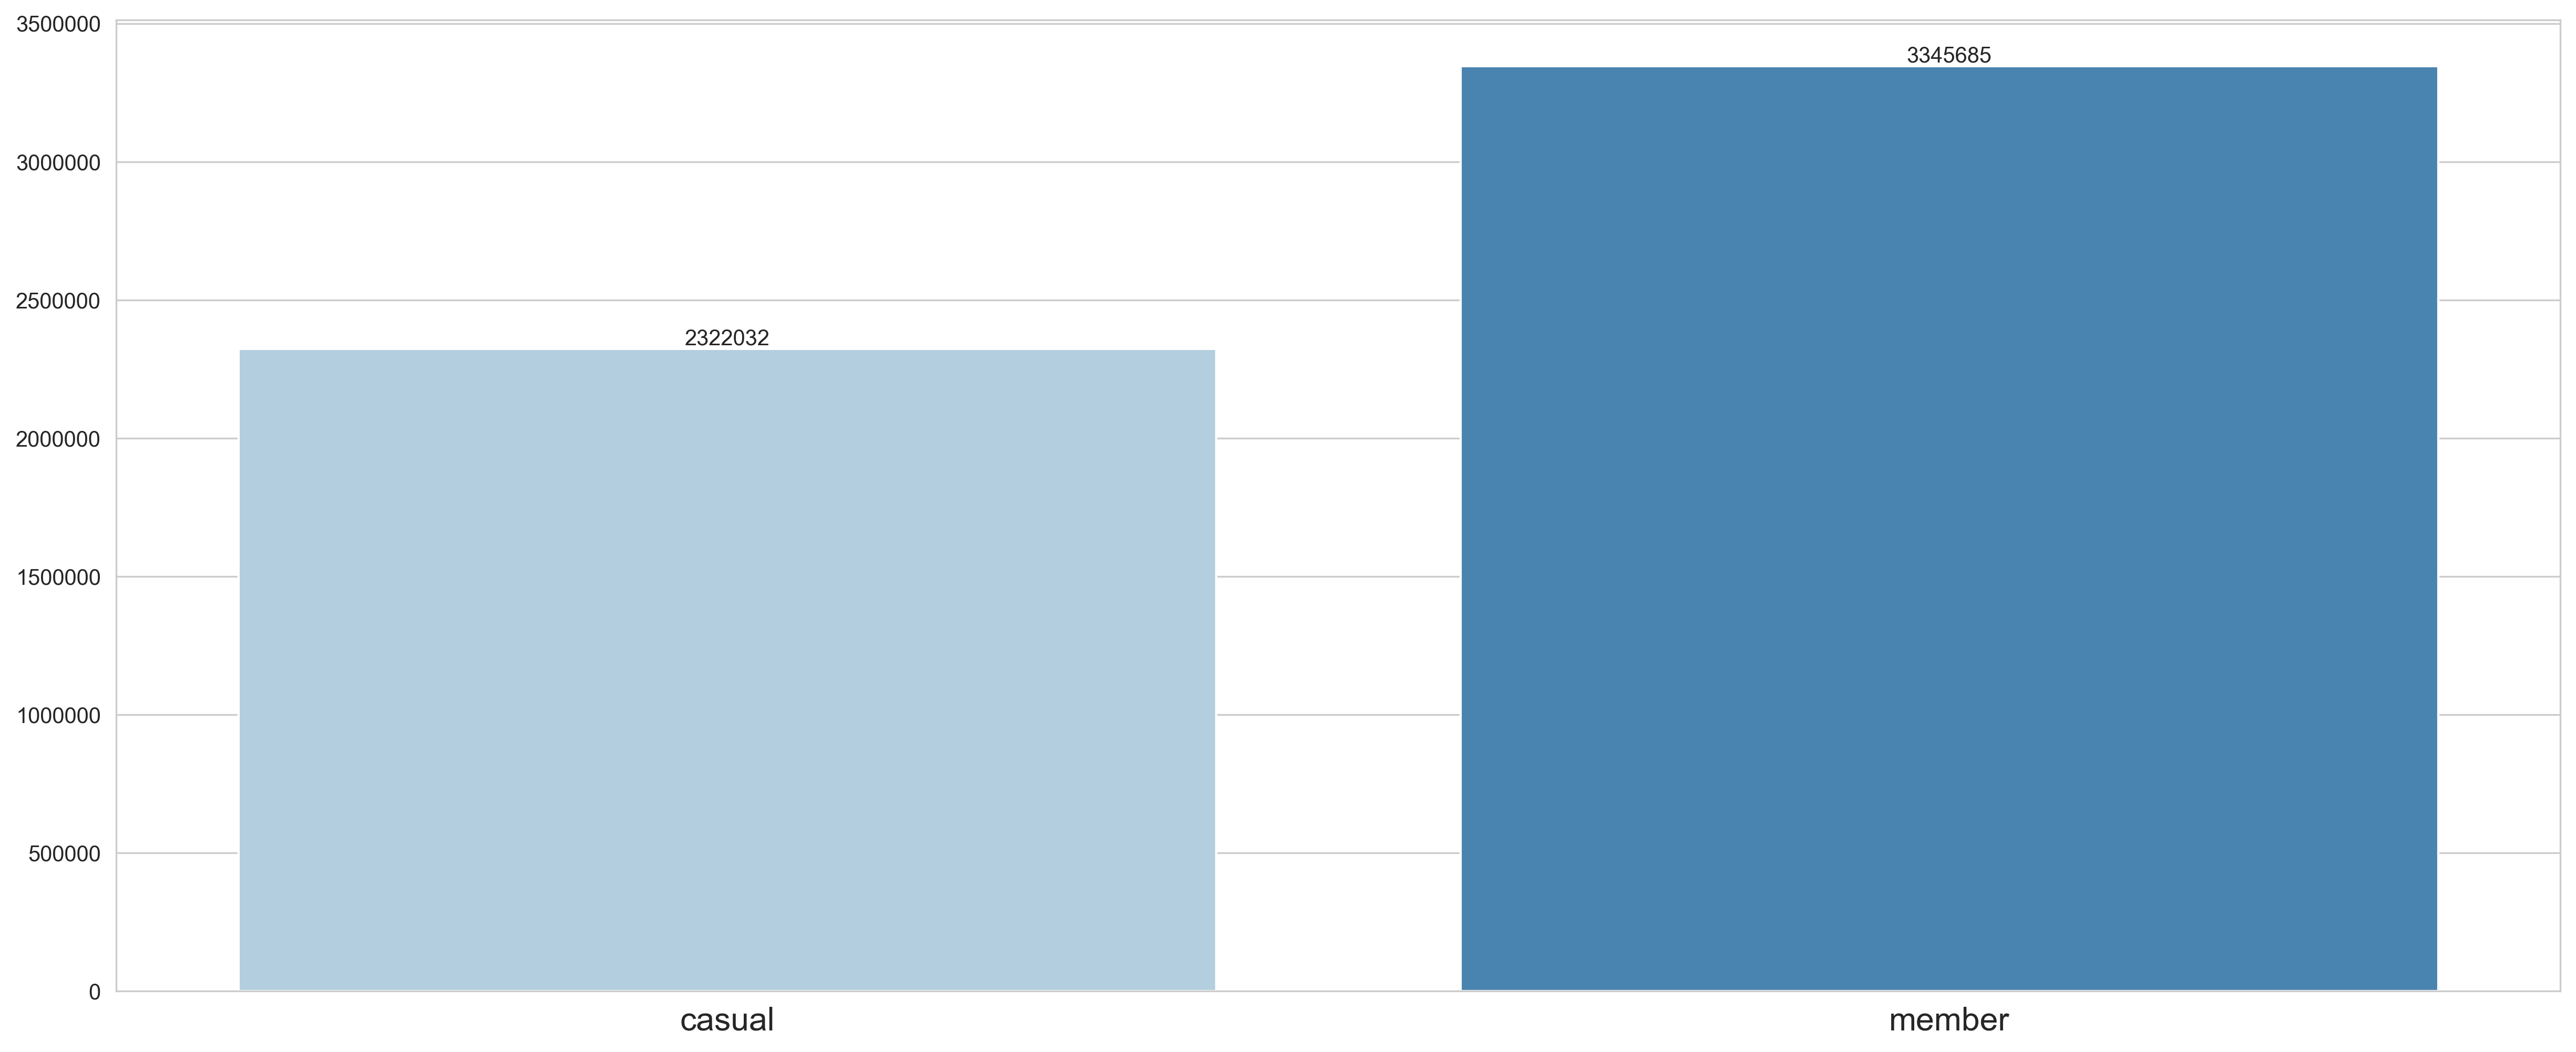

In [78]:
plt.figure(figsize=(20,8), dpi = 300)
plt.ticklabel_format(style='plain', axis='y')
data = data_2022.groupby(['member_casual']).size()
pal = sns.color_palette(plot_color, len(data))
rank = data.argsort().argsort()
ax = sns.barplot(x = data.index, y = data, palette= np.array(pal)[rank])
ax.set(xlabel=None)
[ax.bar_label(x, fmt = '%d', fontsize = 10) for x in ax.containers]
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

* Number of Member Riders is far greater than Casual Riders

## B) Lets find out the busiest month of 2022

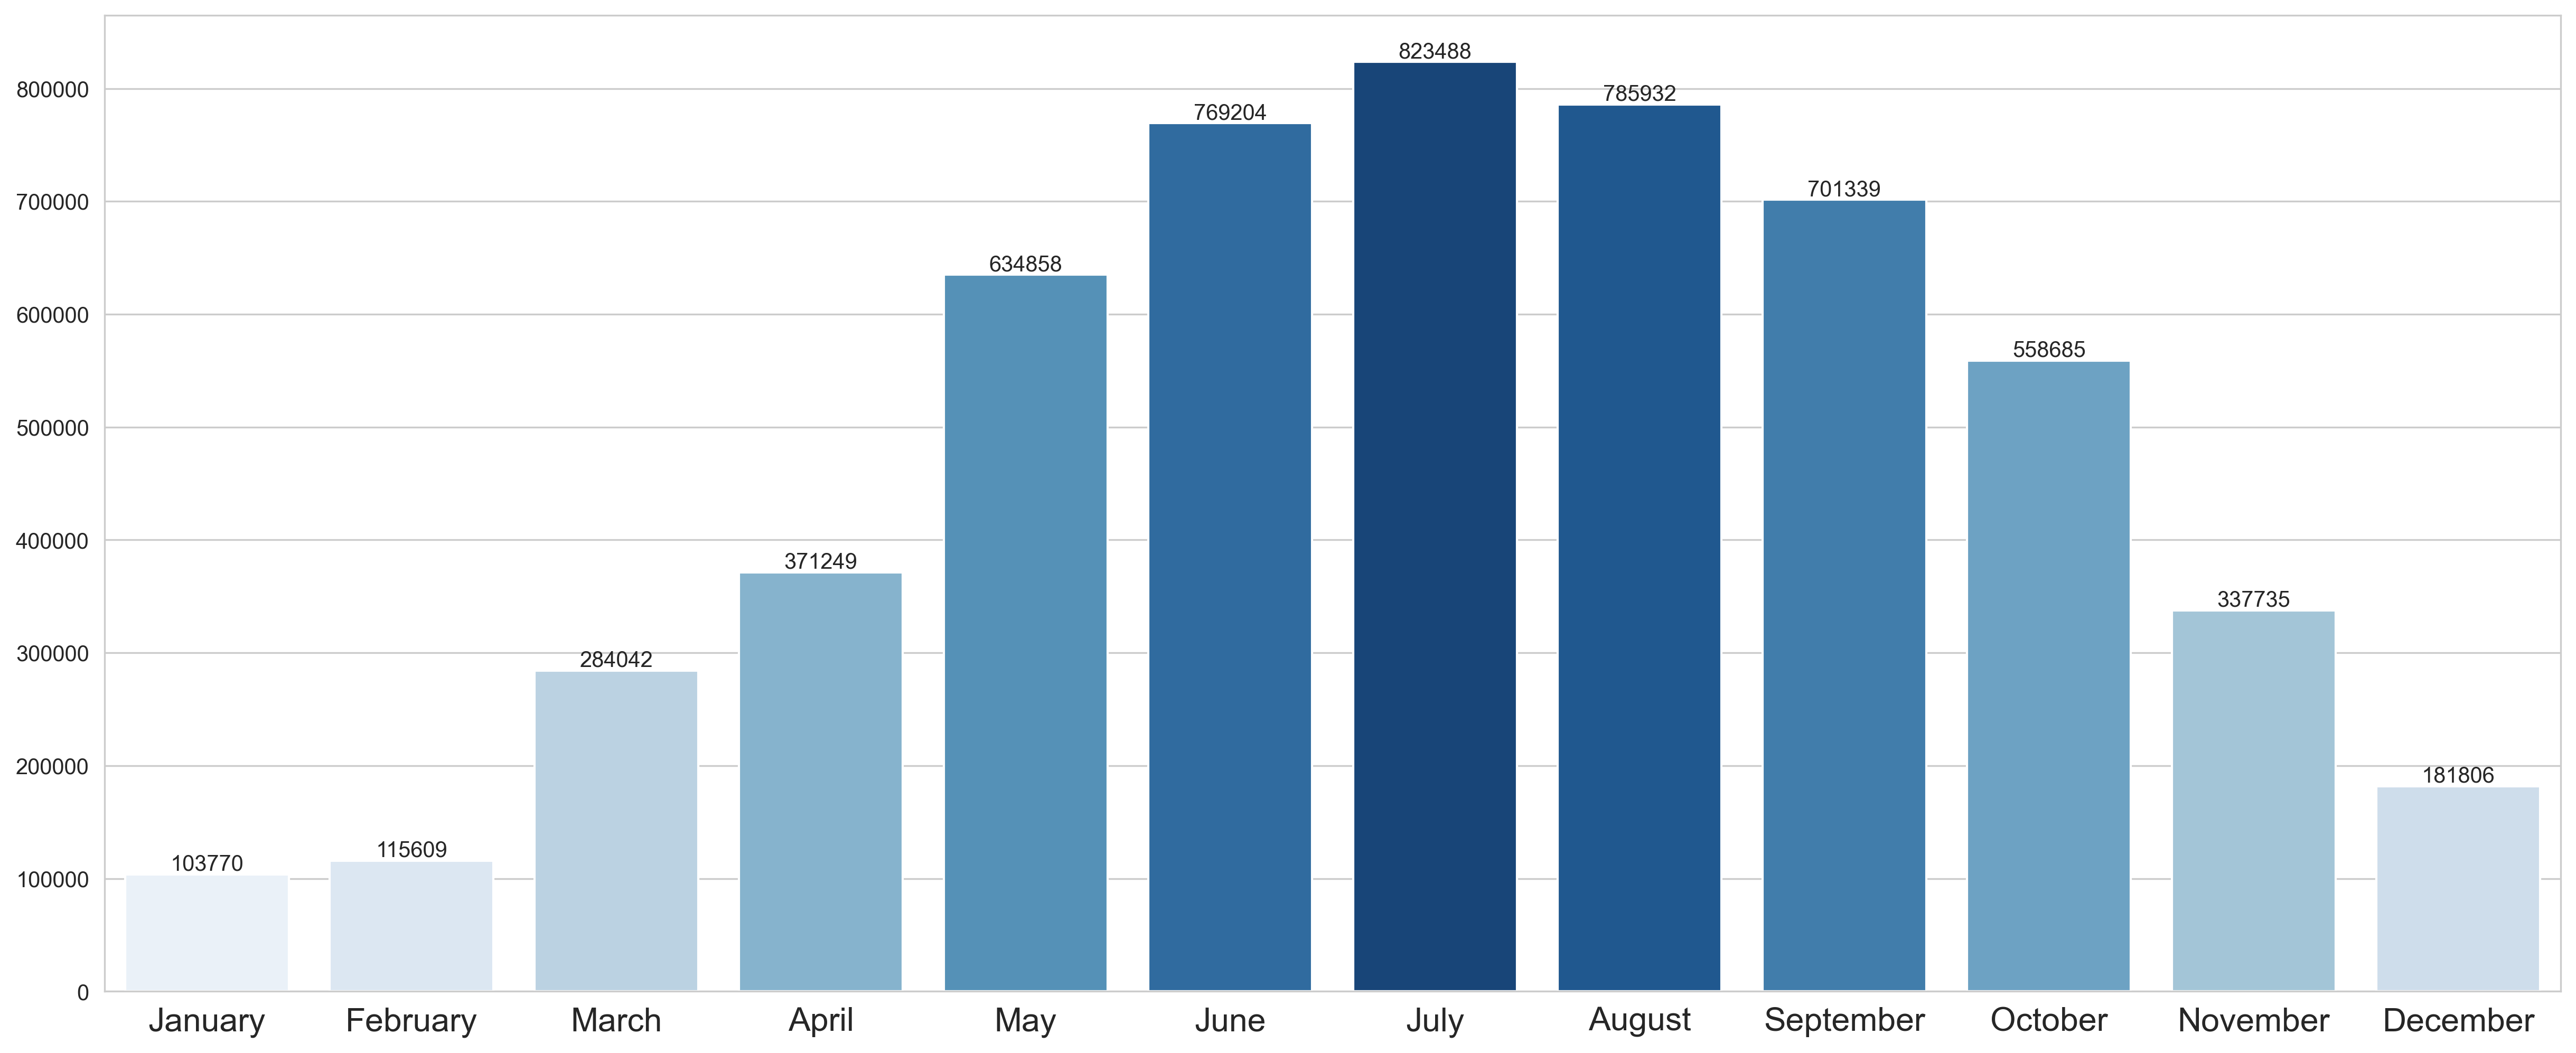

In [72]:
plt.figure(figsize=(20,8), dpi = 300)
data = data_2022.groupby('month').size()
pal = sns.color_palette(plot_color, len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data.index, y=data, palette=np.array(pal)[rank])
ax.set(xlabel=None)
[ax.bar_label(x, fontsize = 10) for x in ax.containers]
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

* June, July and August were the busiest months of 2022

## C) Lets find out the busiest week day of 2022

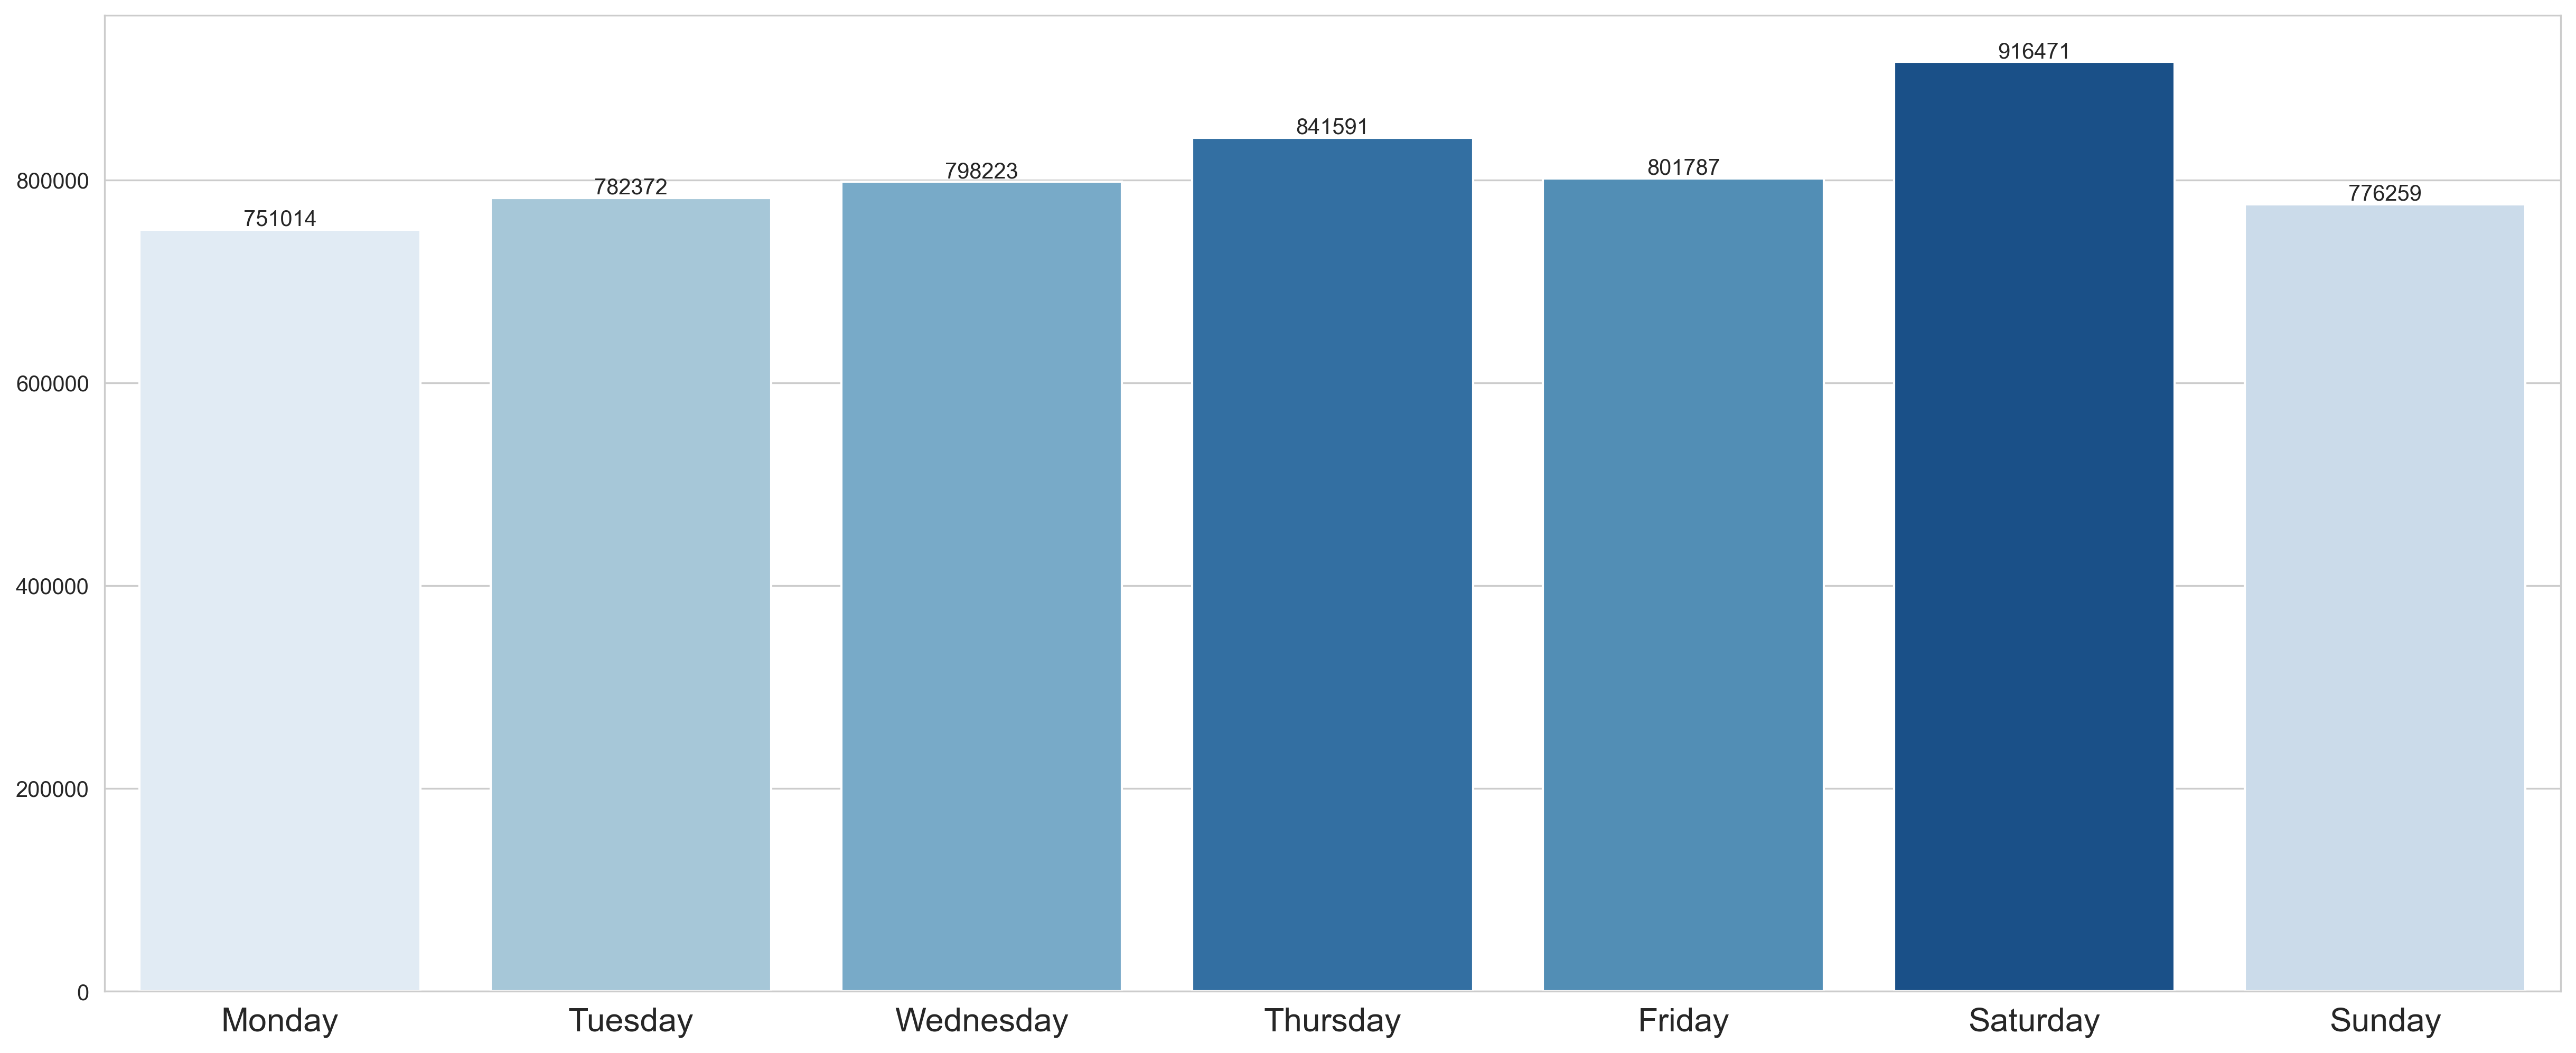

In [73]:
plt.figure(figsize=(20,8), dpi = 300)
data = data_2022.groupby(['day']).size()
pal = sns.color_palette(plot_color, len(data))
rank = data.argsort().argsort()
ax = sns.barplot(x = data.index, y = data, palette=np.array(pal)[rank])
[ax.bar_label(x, fontsize = 10) for x in ax.containers]
ax.set(xlabel = None)
ticks = ax.set_xticklabels(ax.get_xticklabels())
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

* Thursdays and Saturdays were the busiest days of 2022

## D) Lets find out the busiest hour of 2022

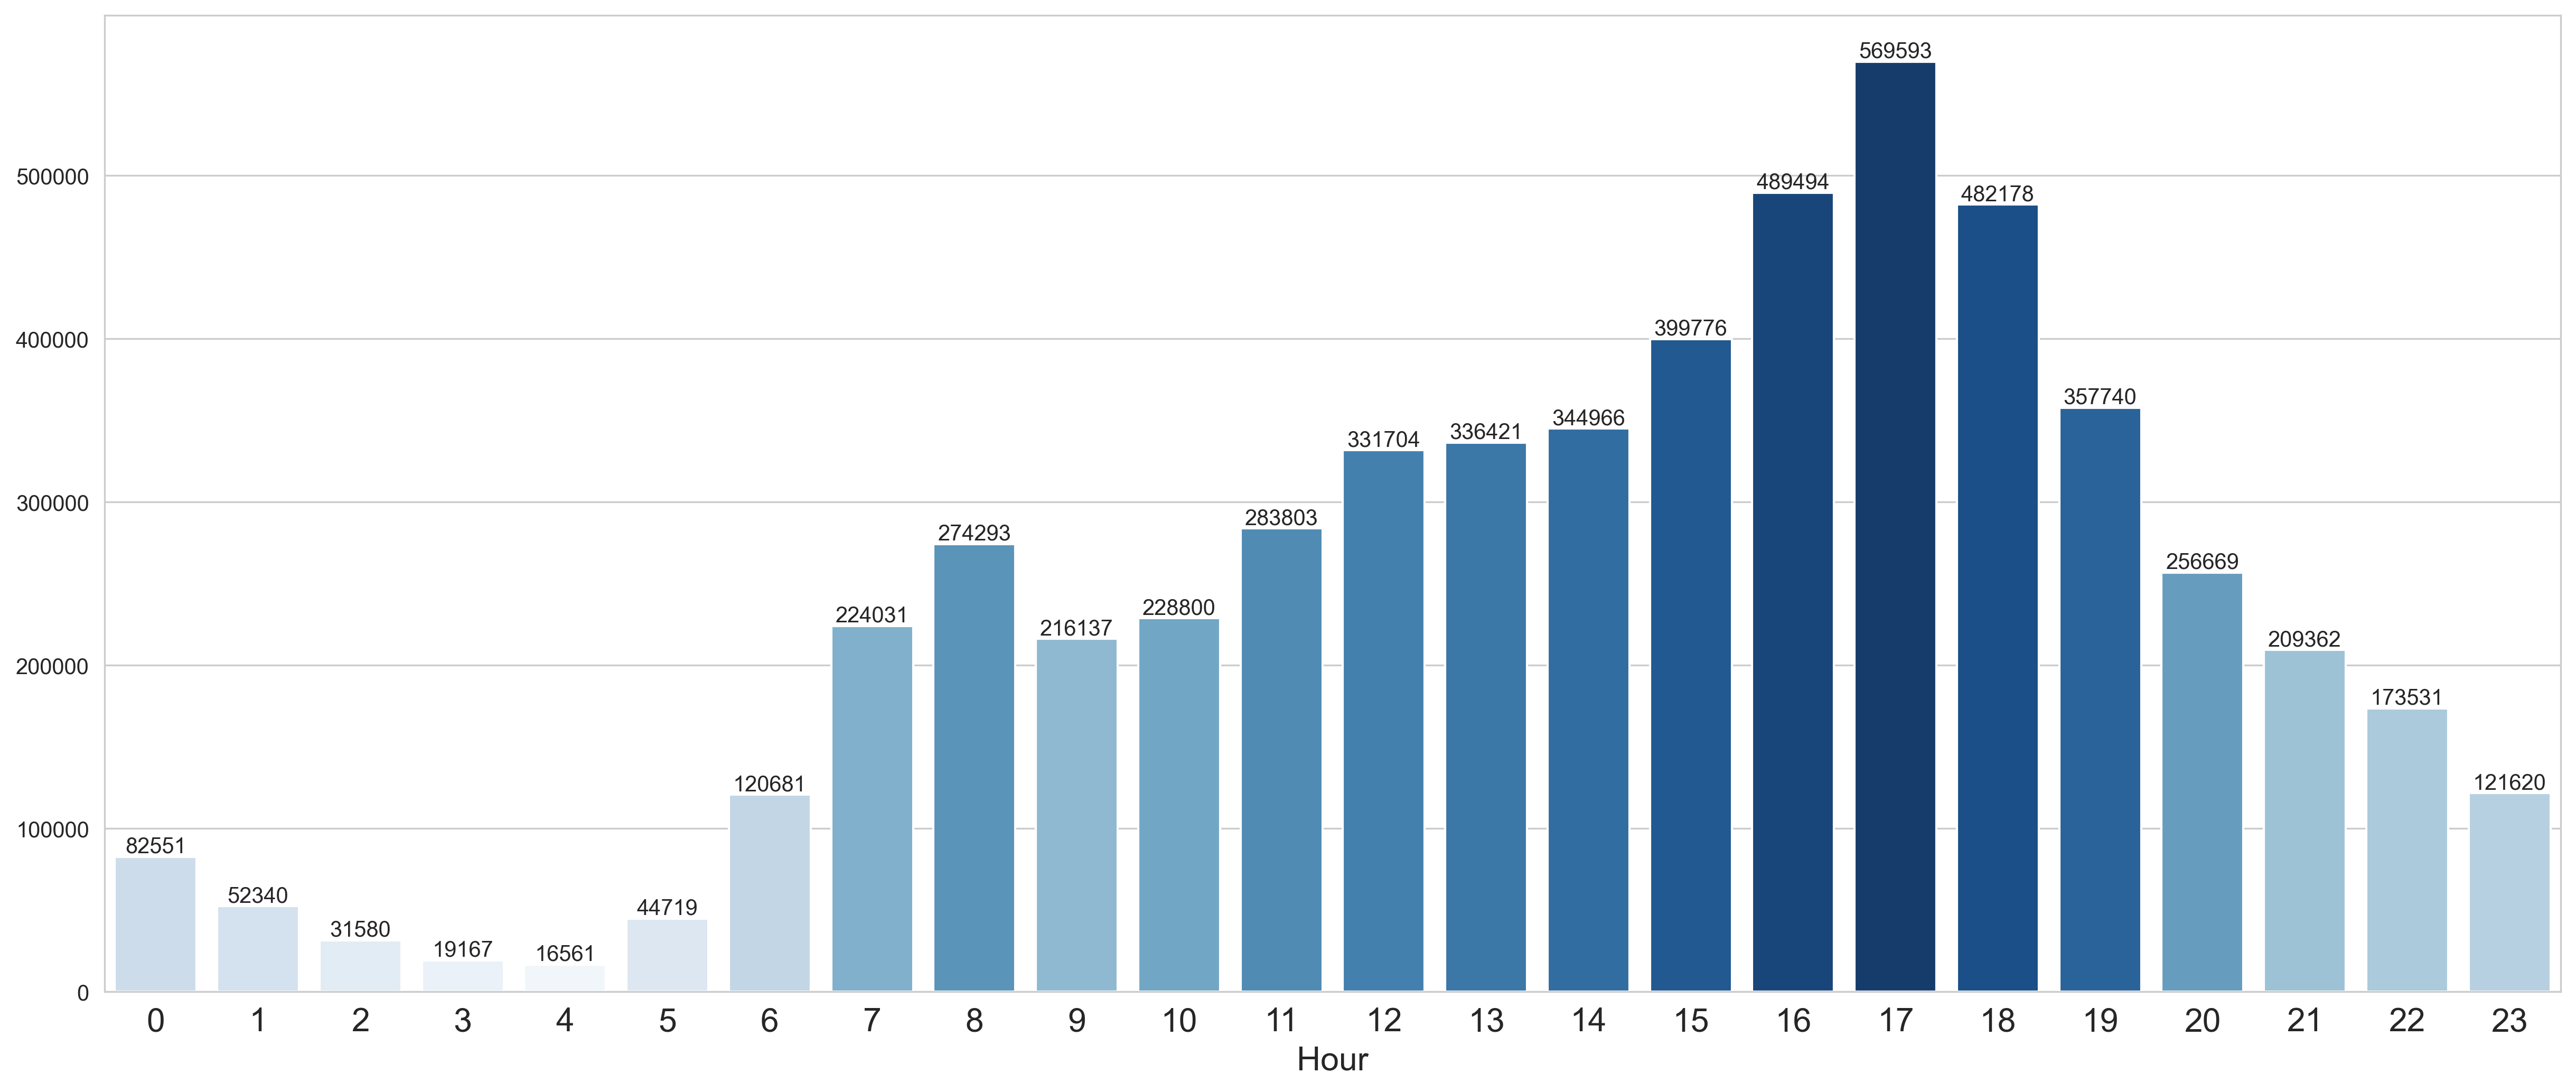

In [95]:
plt.figure(figsize=(20,8), dpi = 300)
data = data_2022.groupby(['hour']).size()
pal = sns.color_palette(plot_color, len(data))
rank = data.argsort().argsort()
ax = sns.barplot(x = data.index, y = data, palette=np.array(pal)[rank])
[ax.bar_label(x, fontsize = 10) for x in ax.containers]
ax.set_xlabel(xlabel = 'Hour', fontsize = 15)
ticks = ax.set_xticklabels(ax.get_xticklabels())
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

* Evening 4 to 6 were the busiest hours of 2022

## E) Now comes the interesting part: Heatmap!

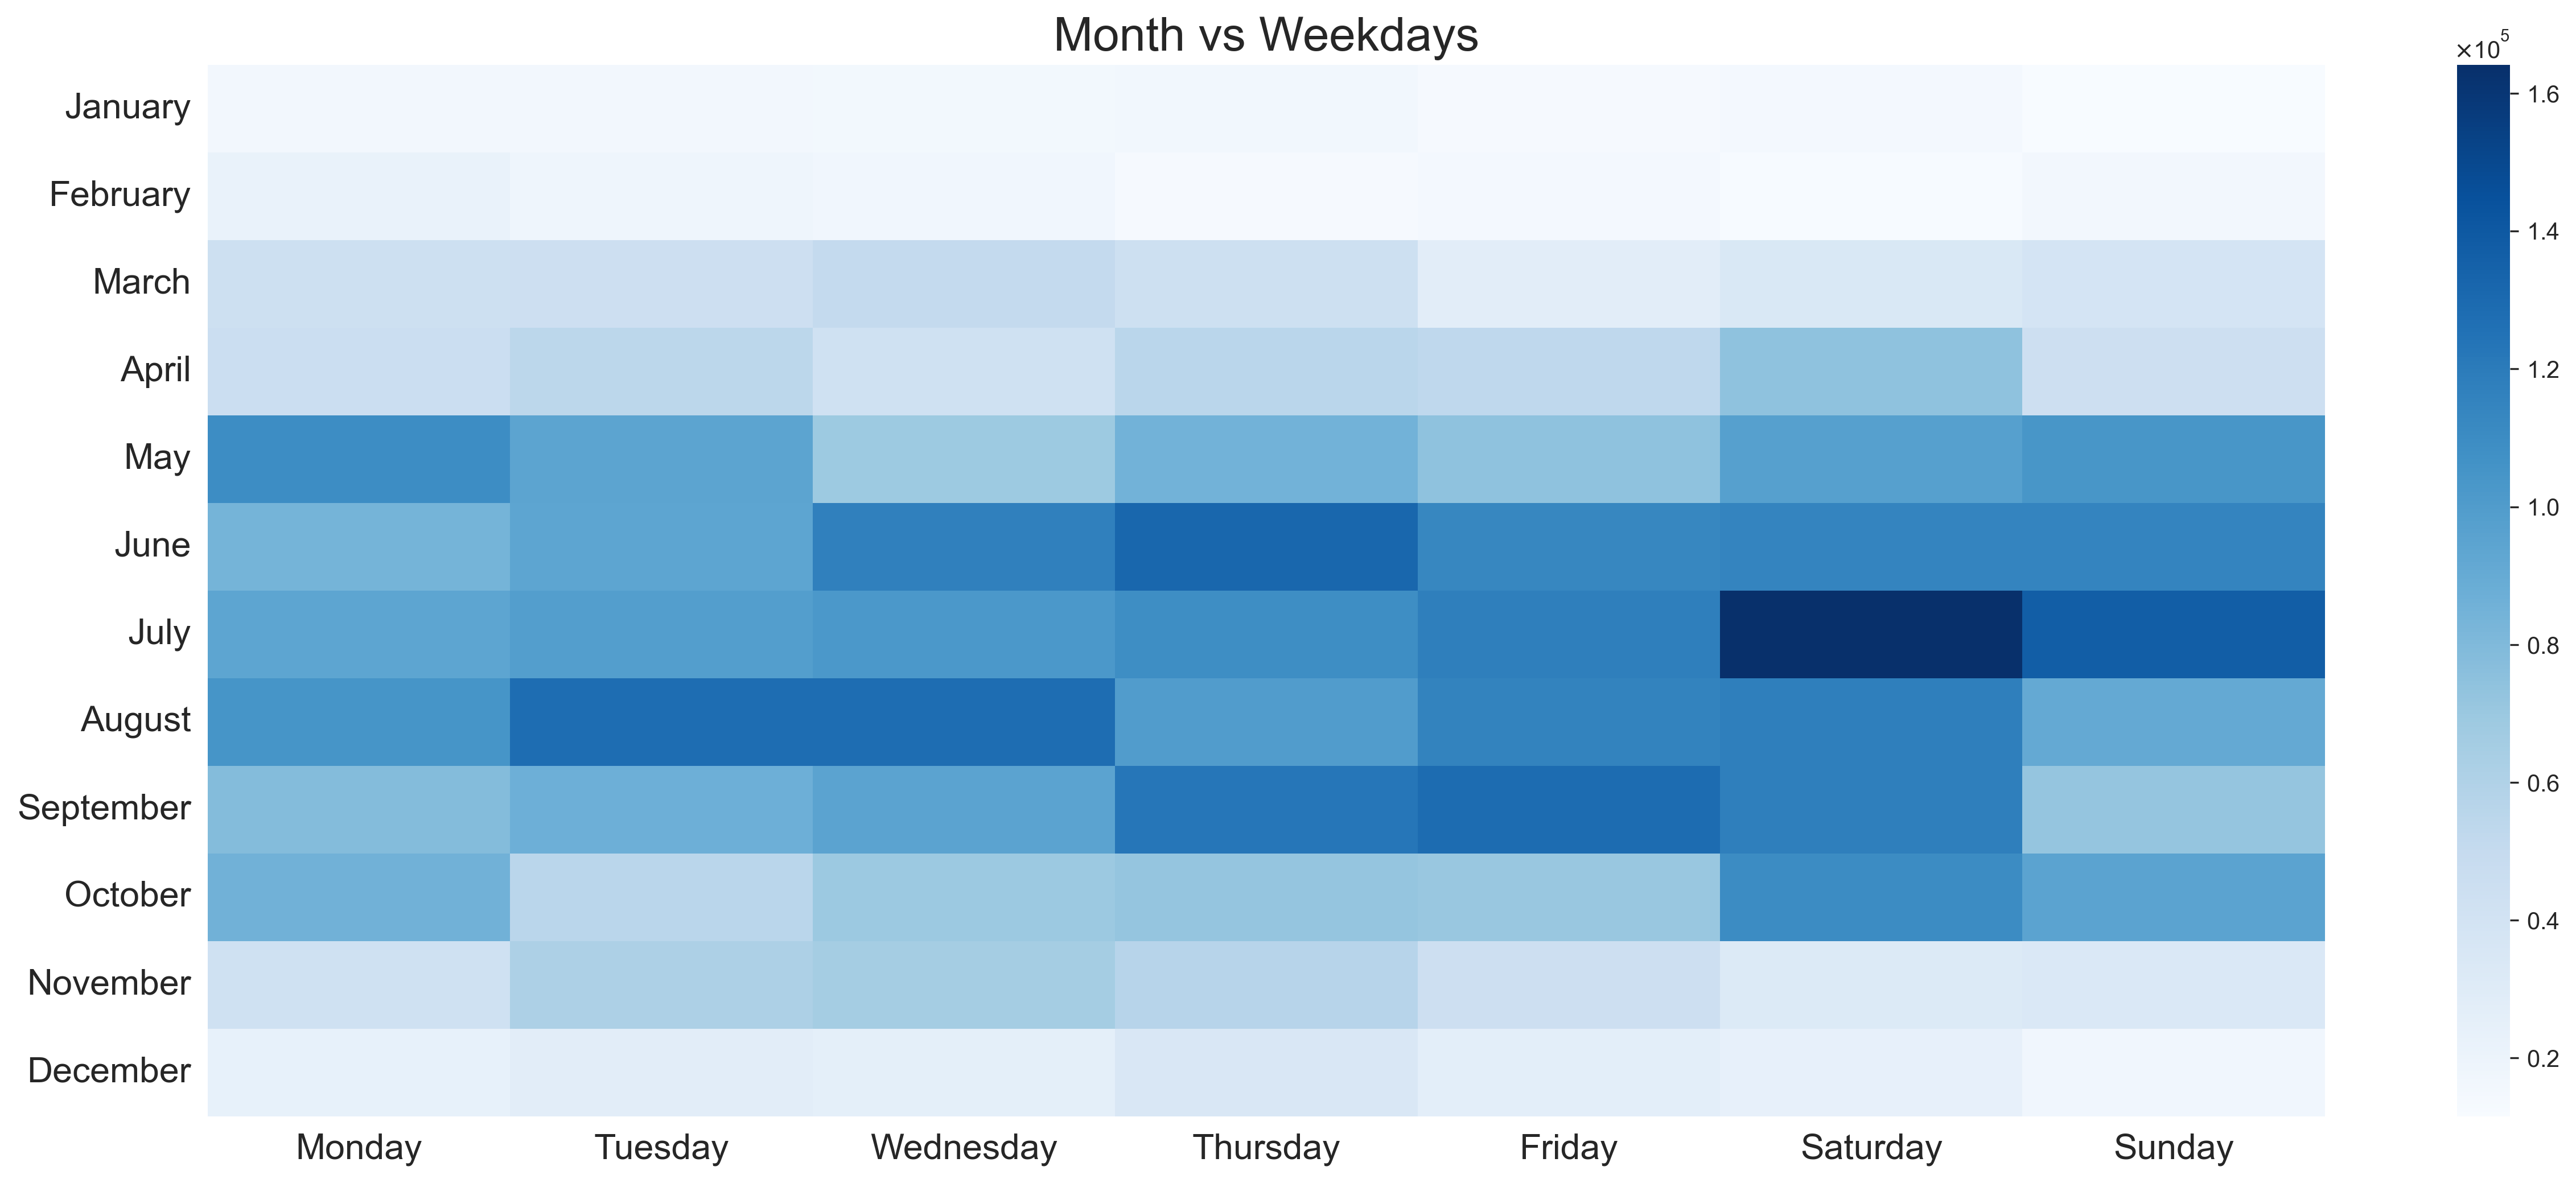

In [82]:
pivot = data_2022.groupby(["day", "month"]).agg('count').reset_index().pivot(index='month', columns='day', values='ride_id')
plt.figure(figsize=(20,8), dpi = 300)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax = sns.heatmap(pivot, cbar_kws={"format": formatter}, cmap = plot_color)
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
ticksy = ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
title = ax.set_title(label='Month vs Weekdays', fontsize = 20)
nx = ax.set(xlabel=None)
ny = ax.set(ylabel=None)

* As the previous plots suggested saturdays of july were the busiest days of 2022

## F) One more heatmap for the hour of the day vs week day

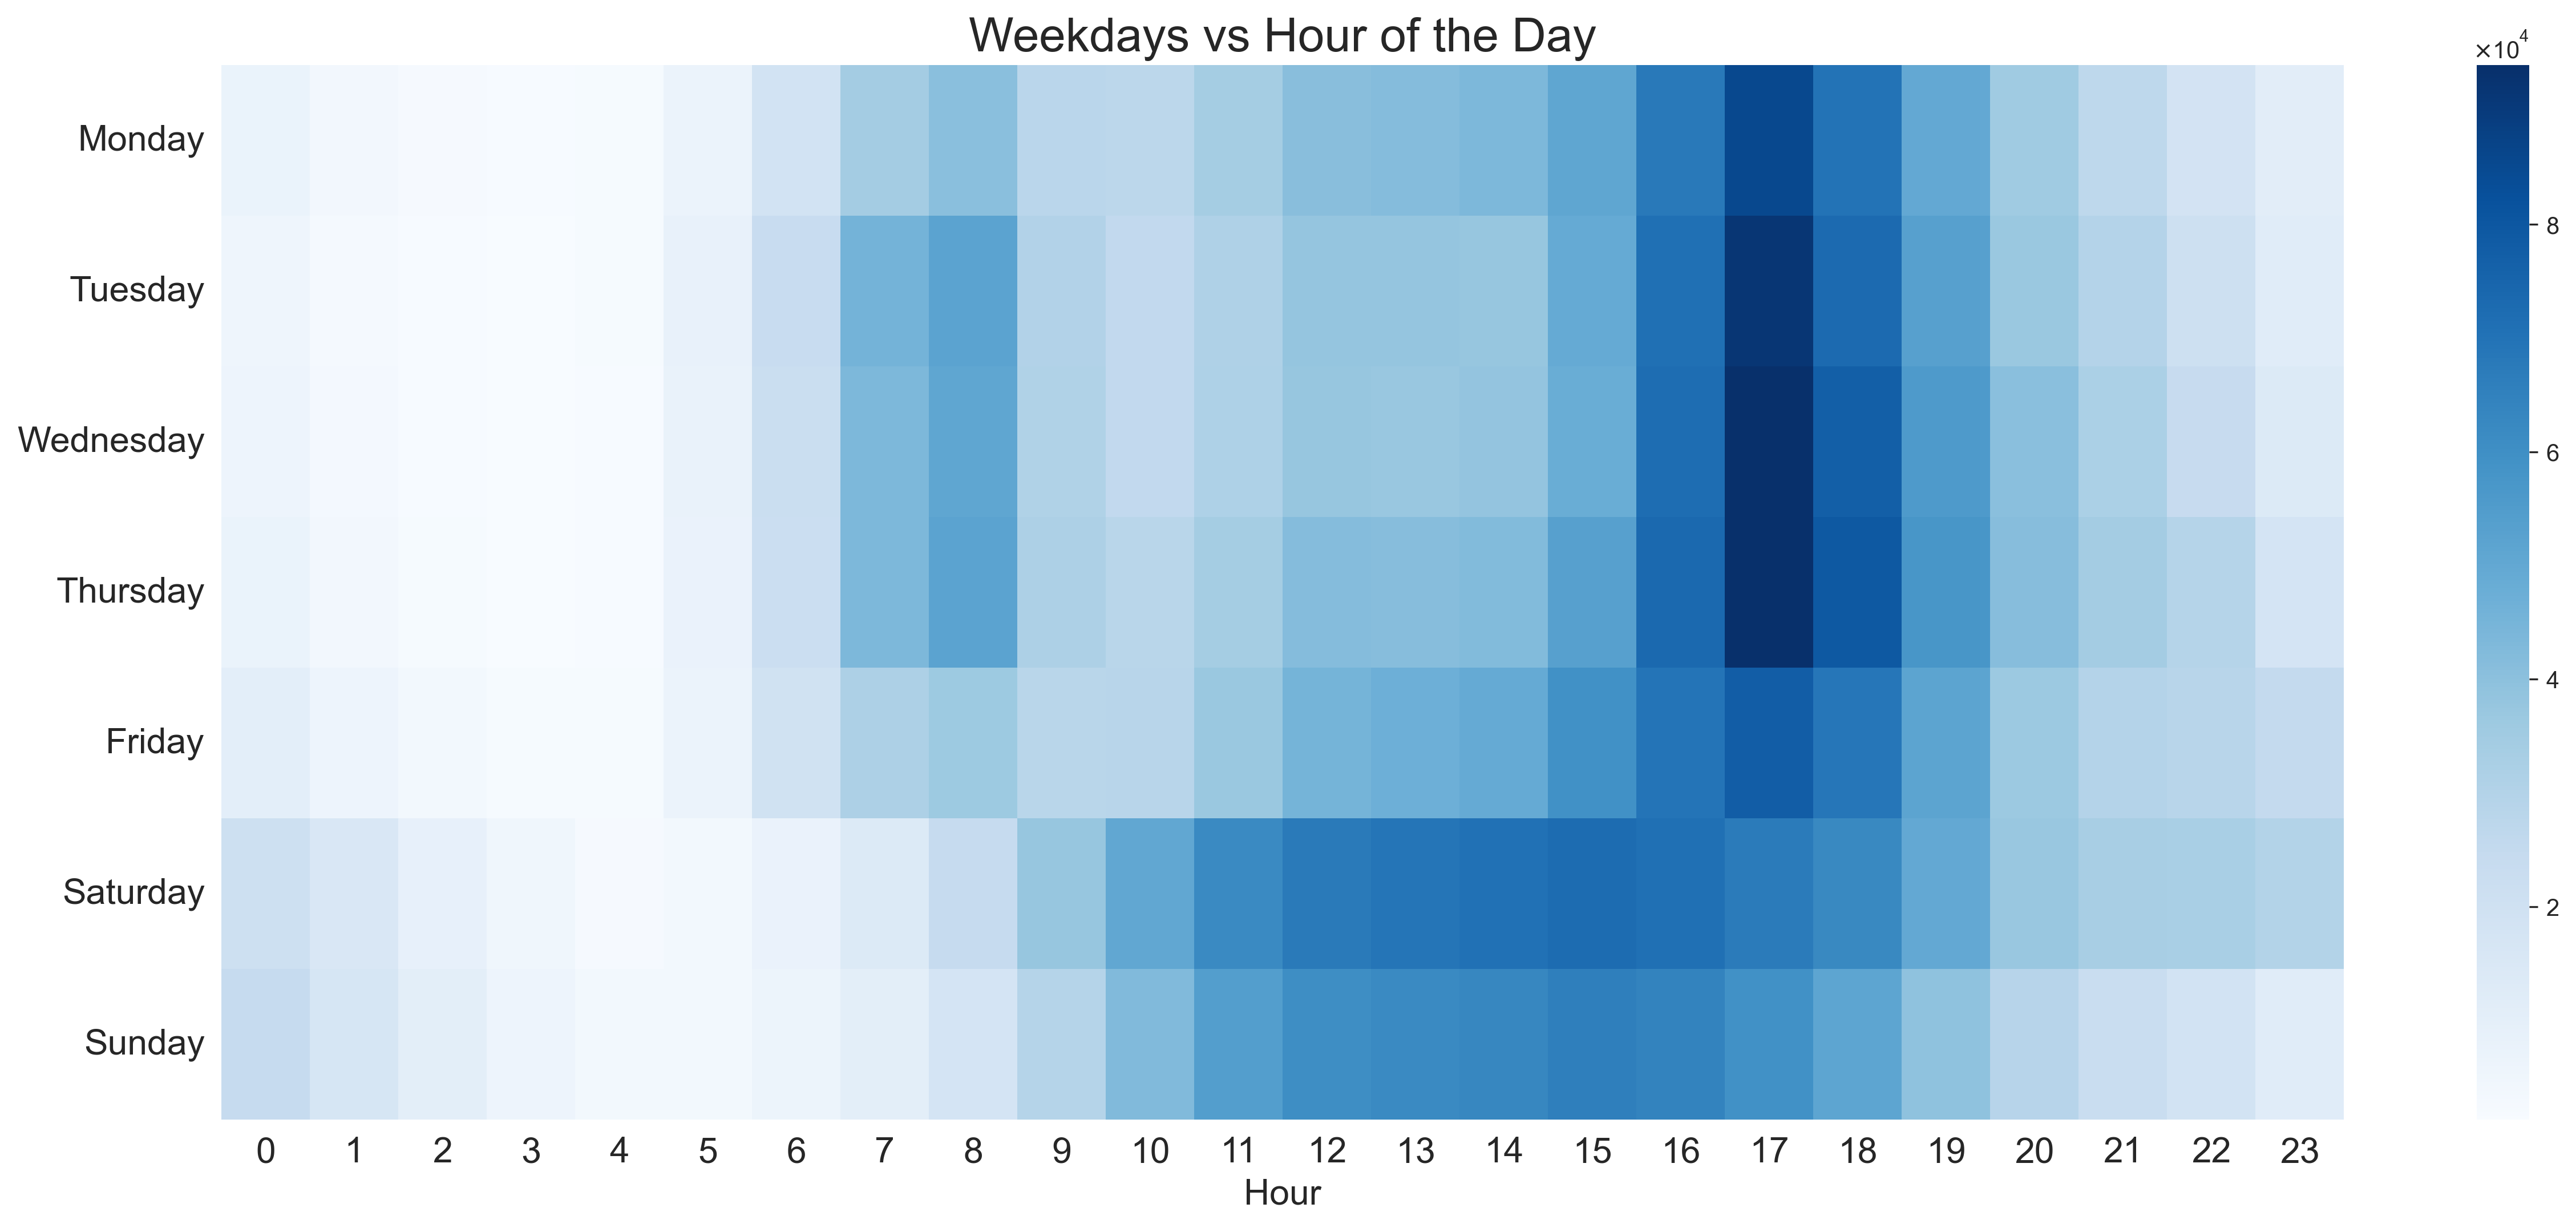

In [91]:
pivot = data_2022.groupby(["day", "hour"]).agg('count').reset_index().pivot(index='day', columns='hour', values='ride_id')
plt.figure(figsize=(20, 8), dpi = 300)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax = sns.heatmap(pivot, cbar_kws={"format": formatter}, cmap = plot_color)
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
ticksy = ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15, rotation = 0)
title = ax.set_title(label='Weekdays vs Hour of the Day', fontsize = 20)
ax.set_xlabel(xlabel = 'Hour', fontsize = 15)
ny = ax.set(ylabel=None)

* Evening 4 to 6 on Tuesday, Wedmesday and Thurday was the busiest

## G) Lets see the trends over time

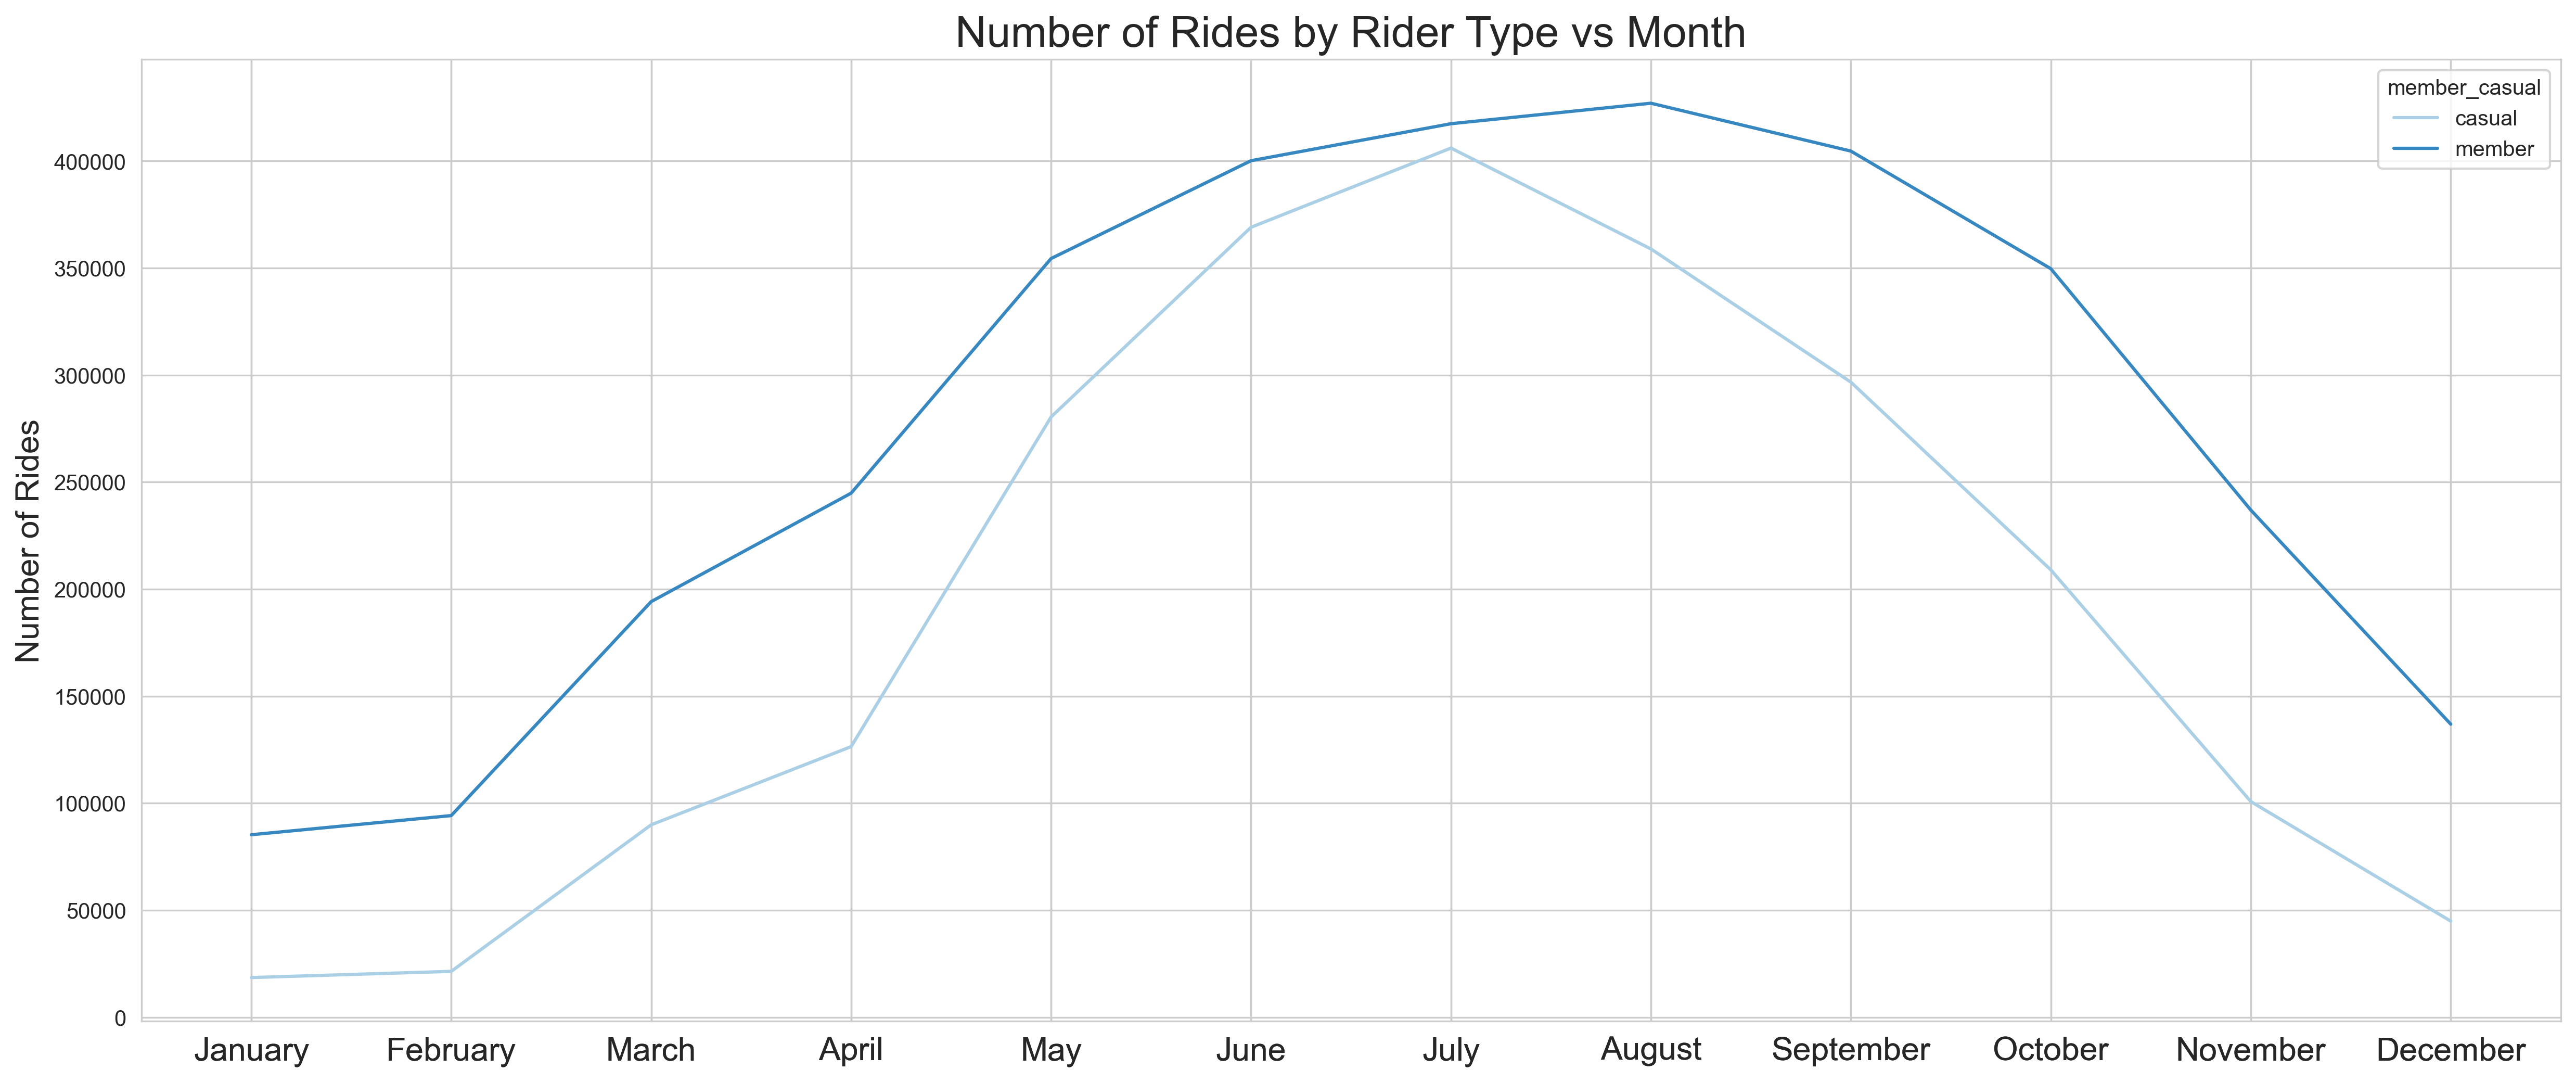

In [110]:
data = data_2022.groupby(['month', 'member_casual']).size().reset_index()
data.columns = ['month', 'member_casual', 'Number of Rides'] 
plt.figure(figsize=(20, 8), dpi = 300)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax = sns.lineplot(x = 'month', y = 'Number of Rides', data = data, hue = 'member_casual', palette=sns.color_palette(plot_color, 2))
ticks = ax.set(xticks = data['month'])
ticks = ax.set_xticklabels(data['month'], fontsize = 15)
title = ax.set_title(label='Number of Rides by Rider Type vs Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of Rides', fontsize = 15)
nx = ax.set(xlabel=None)

* Both Member and Casual Riders appears to be highly active from April to November month 

## H)

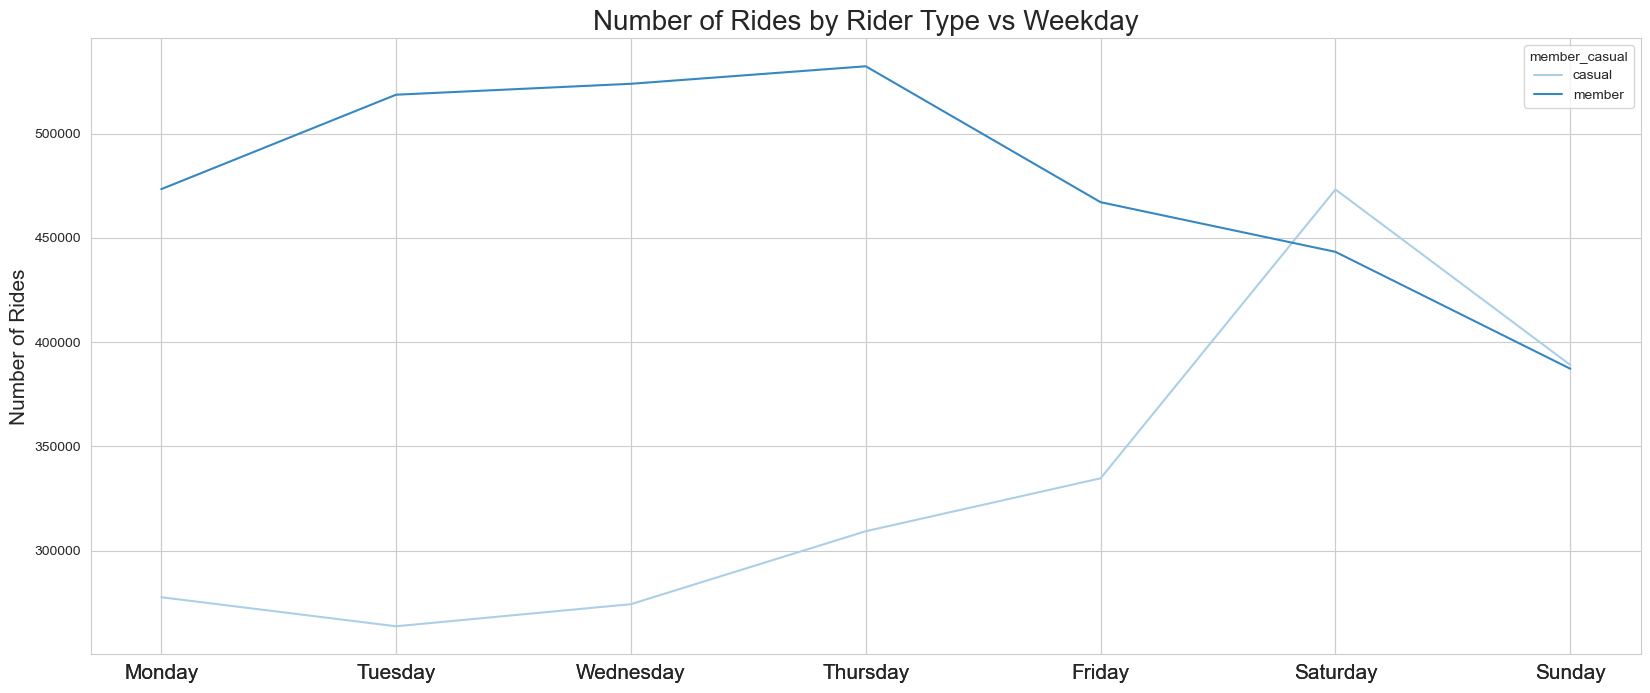

In [121]:
data = data_2022.groupby(['day', 'member_casual']).size().reset_index()
data.columns = ['day', 'member_casual', 'Number of Rides'] 
plt.figure(figsize=(20, 8), dpi = 300)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax = sns.lineplot(x = 'day', y = 'Number of Rides', data = data, hue = 'member_casual', palette=sns.color_palette(plot_color, 2))
ticks = ax.set(xticks = data['day'])
ticks = ax.set_xticklabels(data['day'], fontsize = 15)
title = ax.set_title(label='Number of Rides by Rider Type vs Weekday', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of Rides', fontsize = 15)
nx = ax.set(xlabel=None)
ax.legend()

* Casual riders are highly active during the weekdends
* Whilst Member riders are active throughout the week but less active on weekends 

## I)

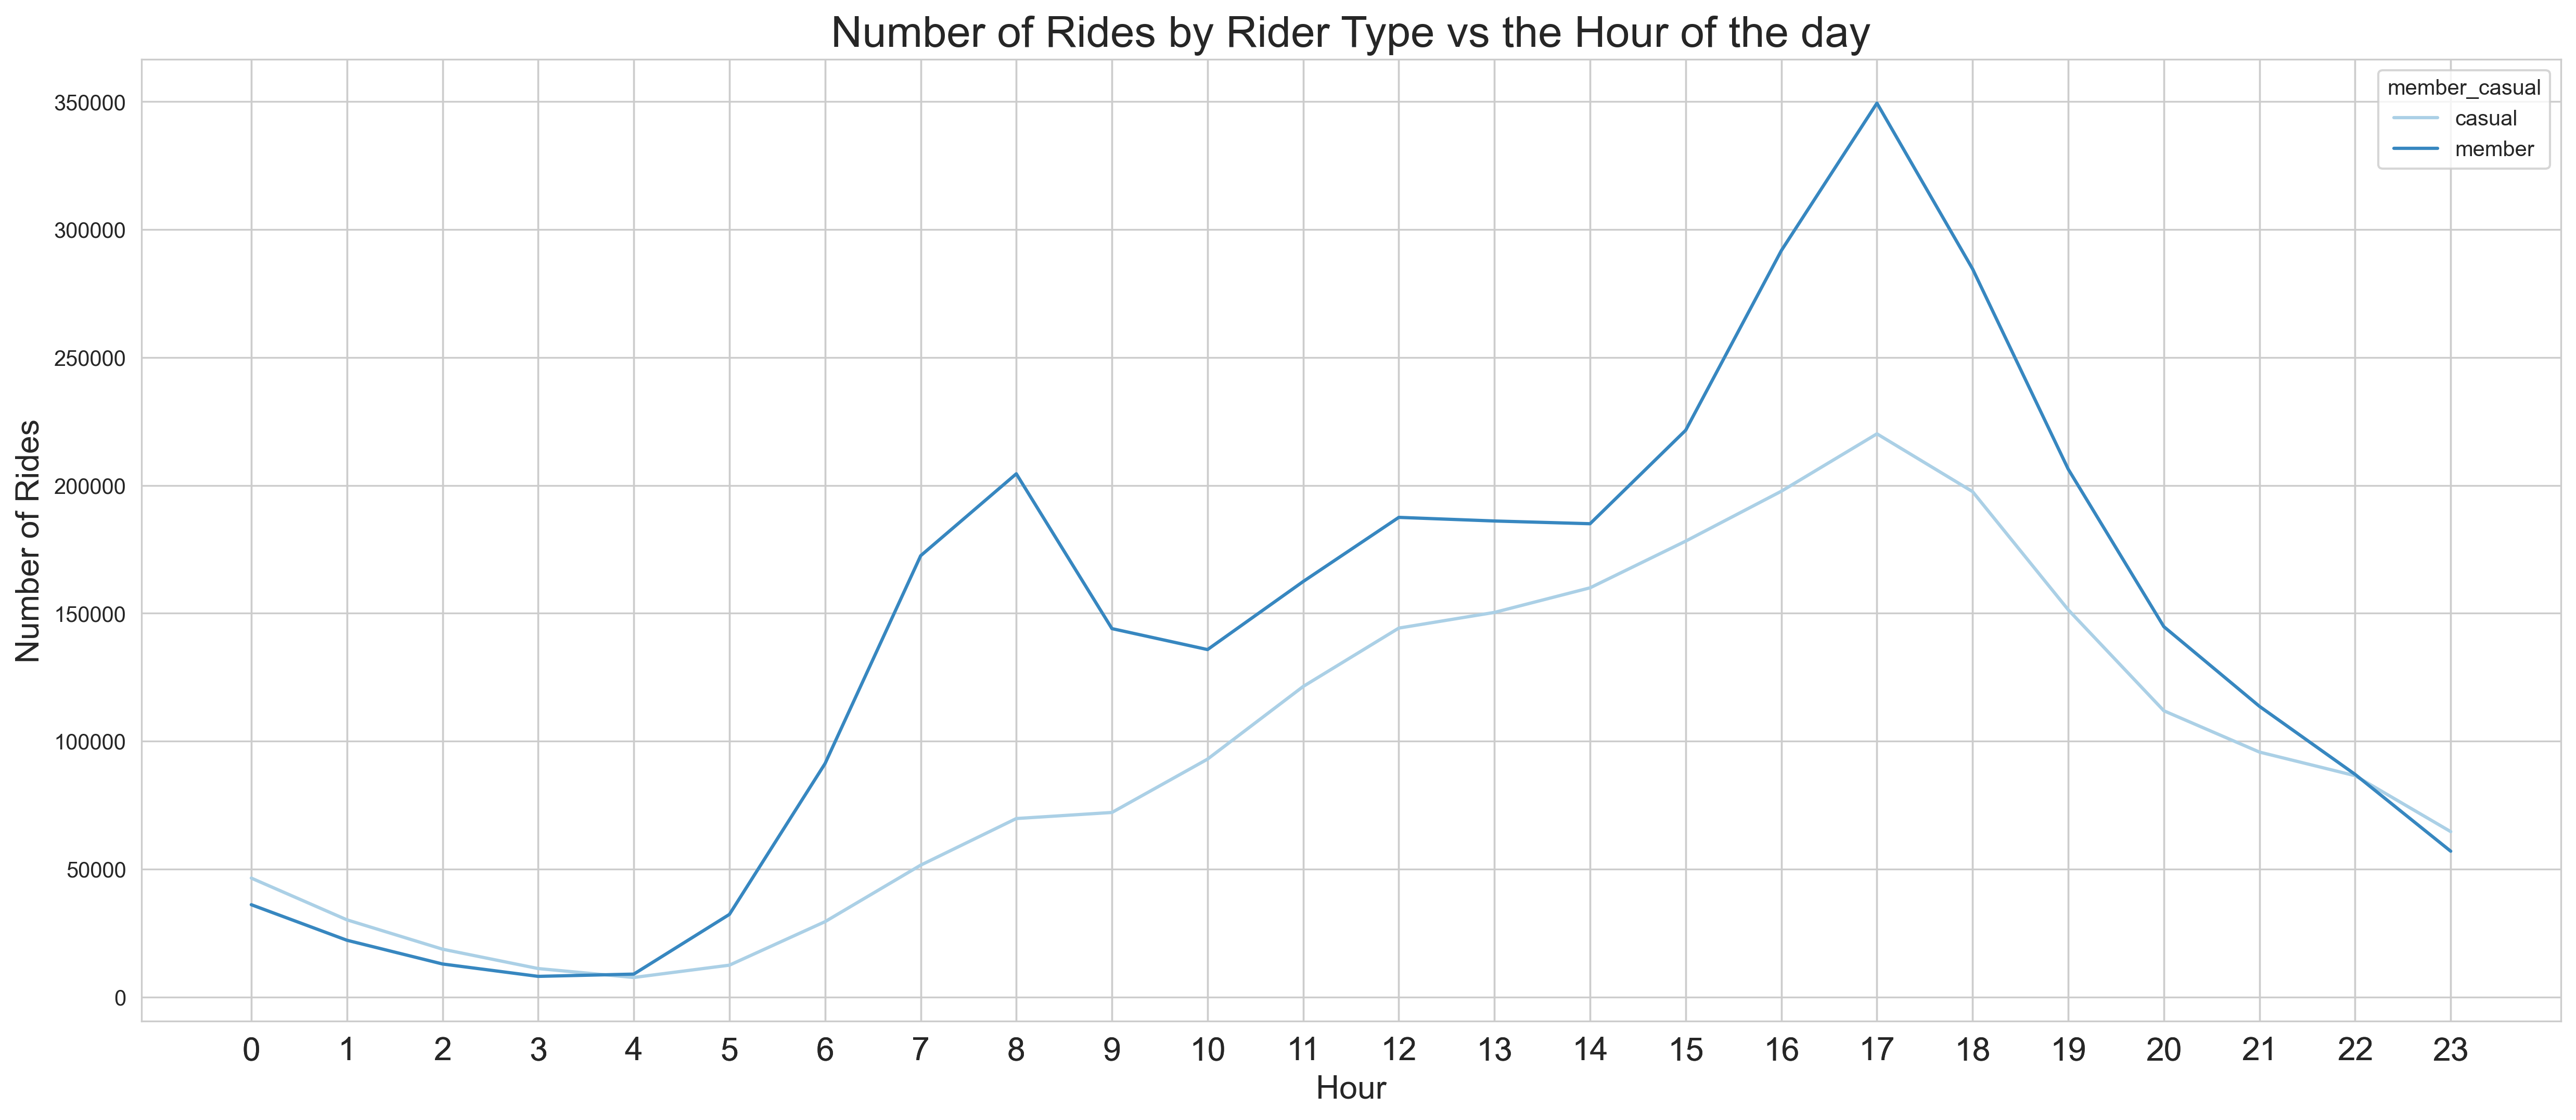

In [122]:
data = data_2022.groupby(['hour', 'member_casual']).size().reset_index()
data.columns = ['hour', 'member_casual', 'Number of Rides'] 
plt.figure(figsize=(20, 8), dpi = 300)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax = sns.lineplot(x = 'hour', y = 'Number of Rides', data = data, hue = 'member_casual', palette=sns.color_palette(plot_color, 2))
ticks = ax.set(xticks = data['hour'])
ticks = ax.set_xticklabels(data['hour'], fontsize = 15)
ax.set_ylabel(ylabel = 'Number of Rides', fontsize = 15)
title = ax.set_title(label='Number of Rides by Rider Type vs the Hour of the day', fontsize = 20)
nx = ax.set_xlabel(xlabel = 'Hour', fontsize = 15)

* Maximum number of rides for both user types can be seen at 4 pm to 6 pm.

## J) 10 Most useed starting stations by Member Riders

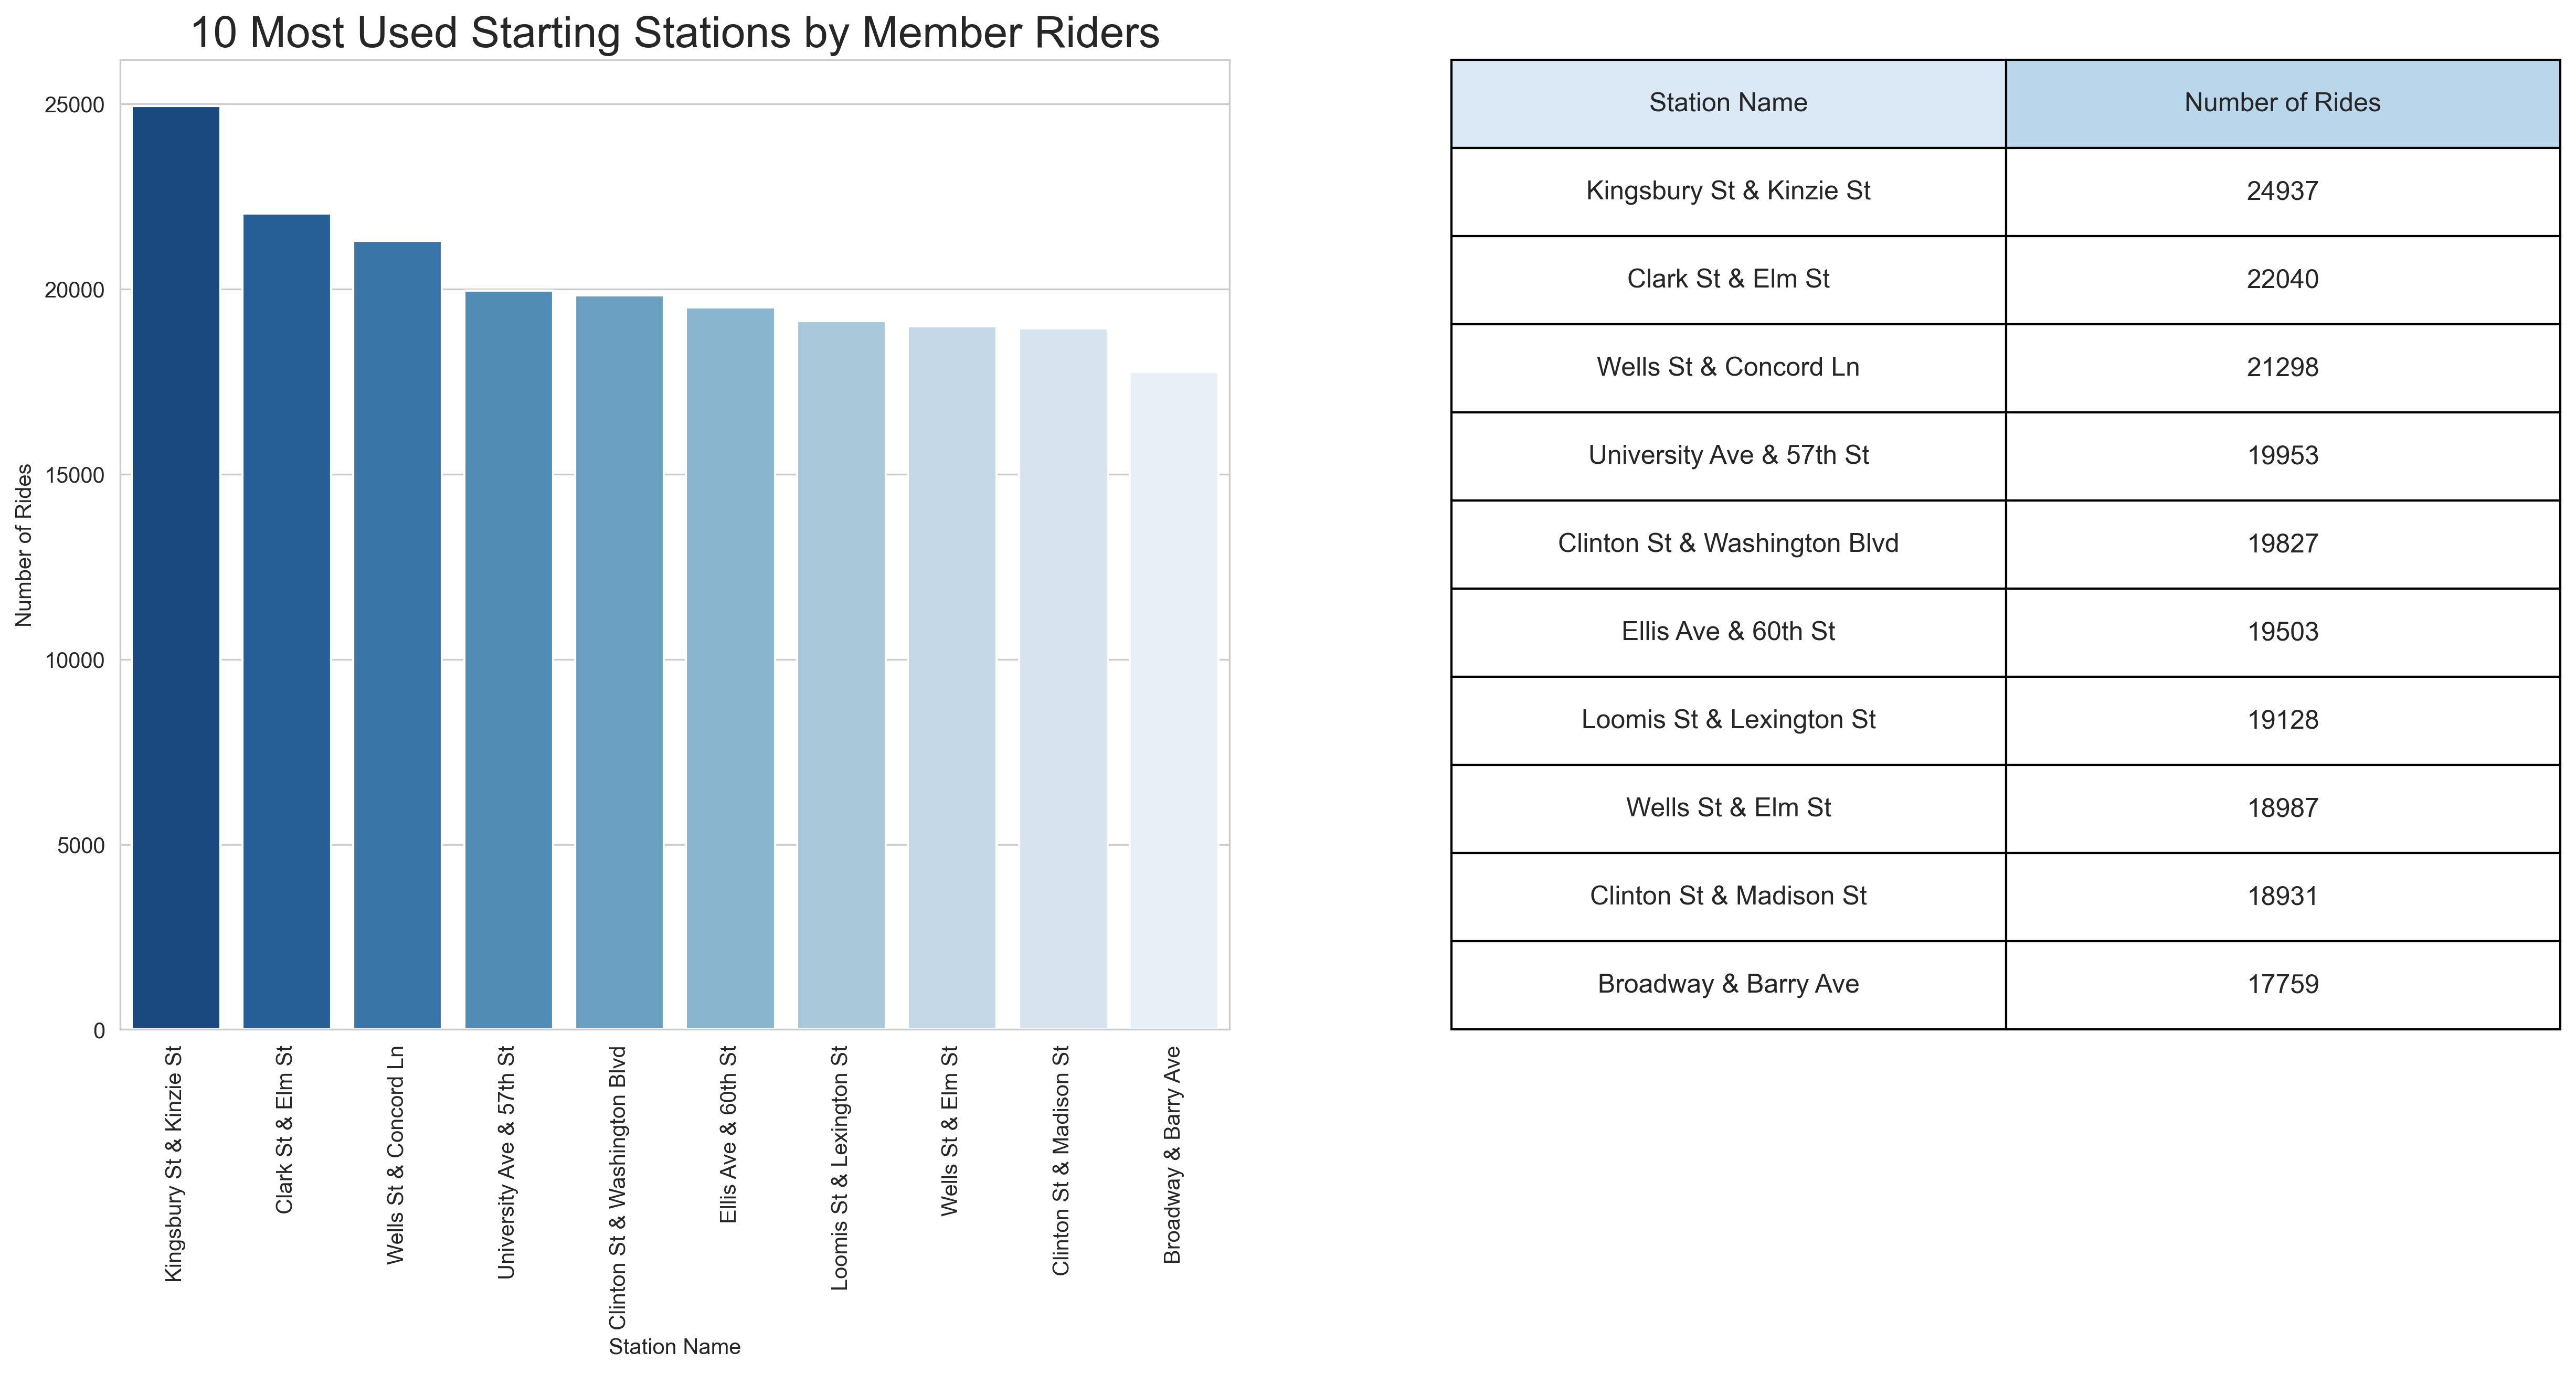

In [127]:
data = data_2022[data_2022['member_casual']=='member']['start_station_name'].value_counts()[:10].reset_index()
fig = plt.figure(figsize=(20,8), dpi = 300)
rank = data['start_station_name'].argsort()
pal = sns.color_palette(plot_color, len(data))

ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x = 'index', y = 'start_station_name', data = data, palette = np.array(pal)[rank])

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = data.values, cellLoc = 'center', rowLabels = None, bbox=bbox, colLabels=['Station Name', 'Number of Rides'],  colColours = sns.color_palette(plot_color))
mpl_table.auto_set_font_size(True)
mpl_table.set_fontsize(font_size)
ticks = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# _ = ax2.set_xticklabels(ax2.get_xticklabels())
ax1.set_title(label = '10 Most Used Starting Stations by Member Riders', fontsize = 20)
tx = ax1.set_xlabel(xlabel = 'Station Name')
ty = ax1.set_ylabel(ylabel = 'Number of Rides')

* Kingsbury St & Kinzie St was number 1 starting station for Member Riders

## K) 10 Most useed starting stations by Casual Riders

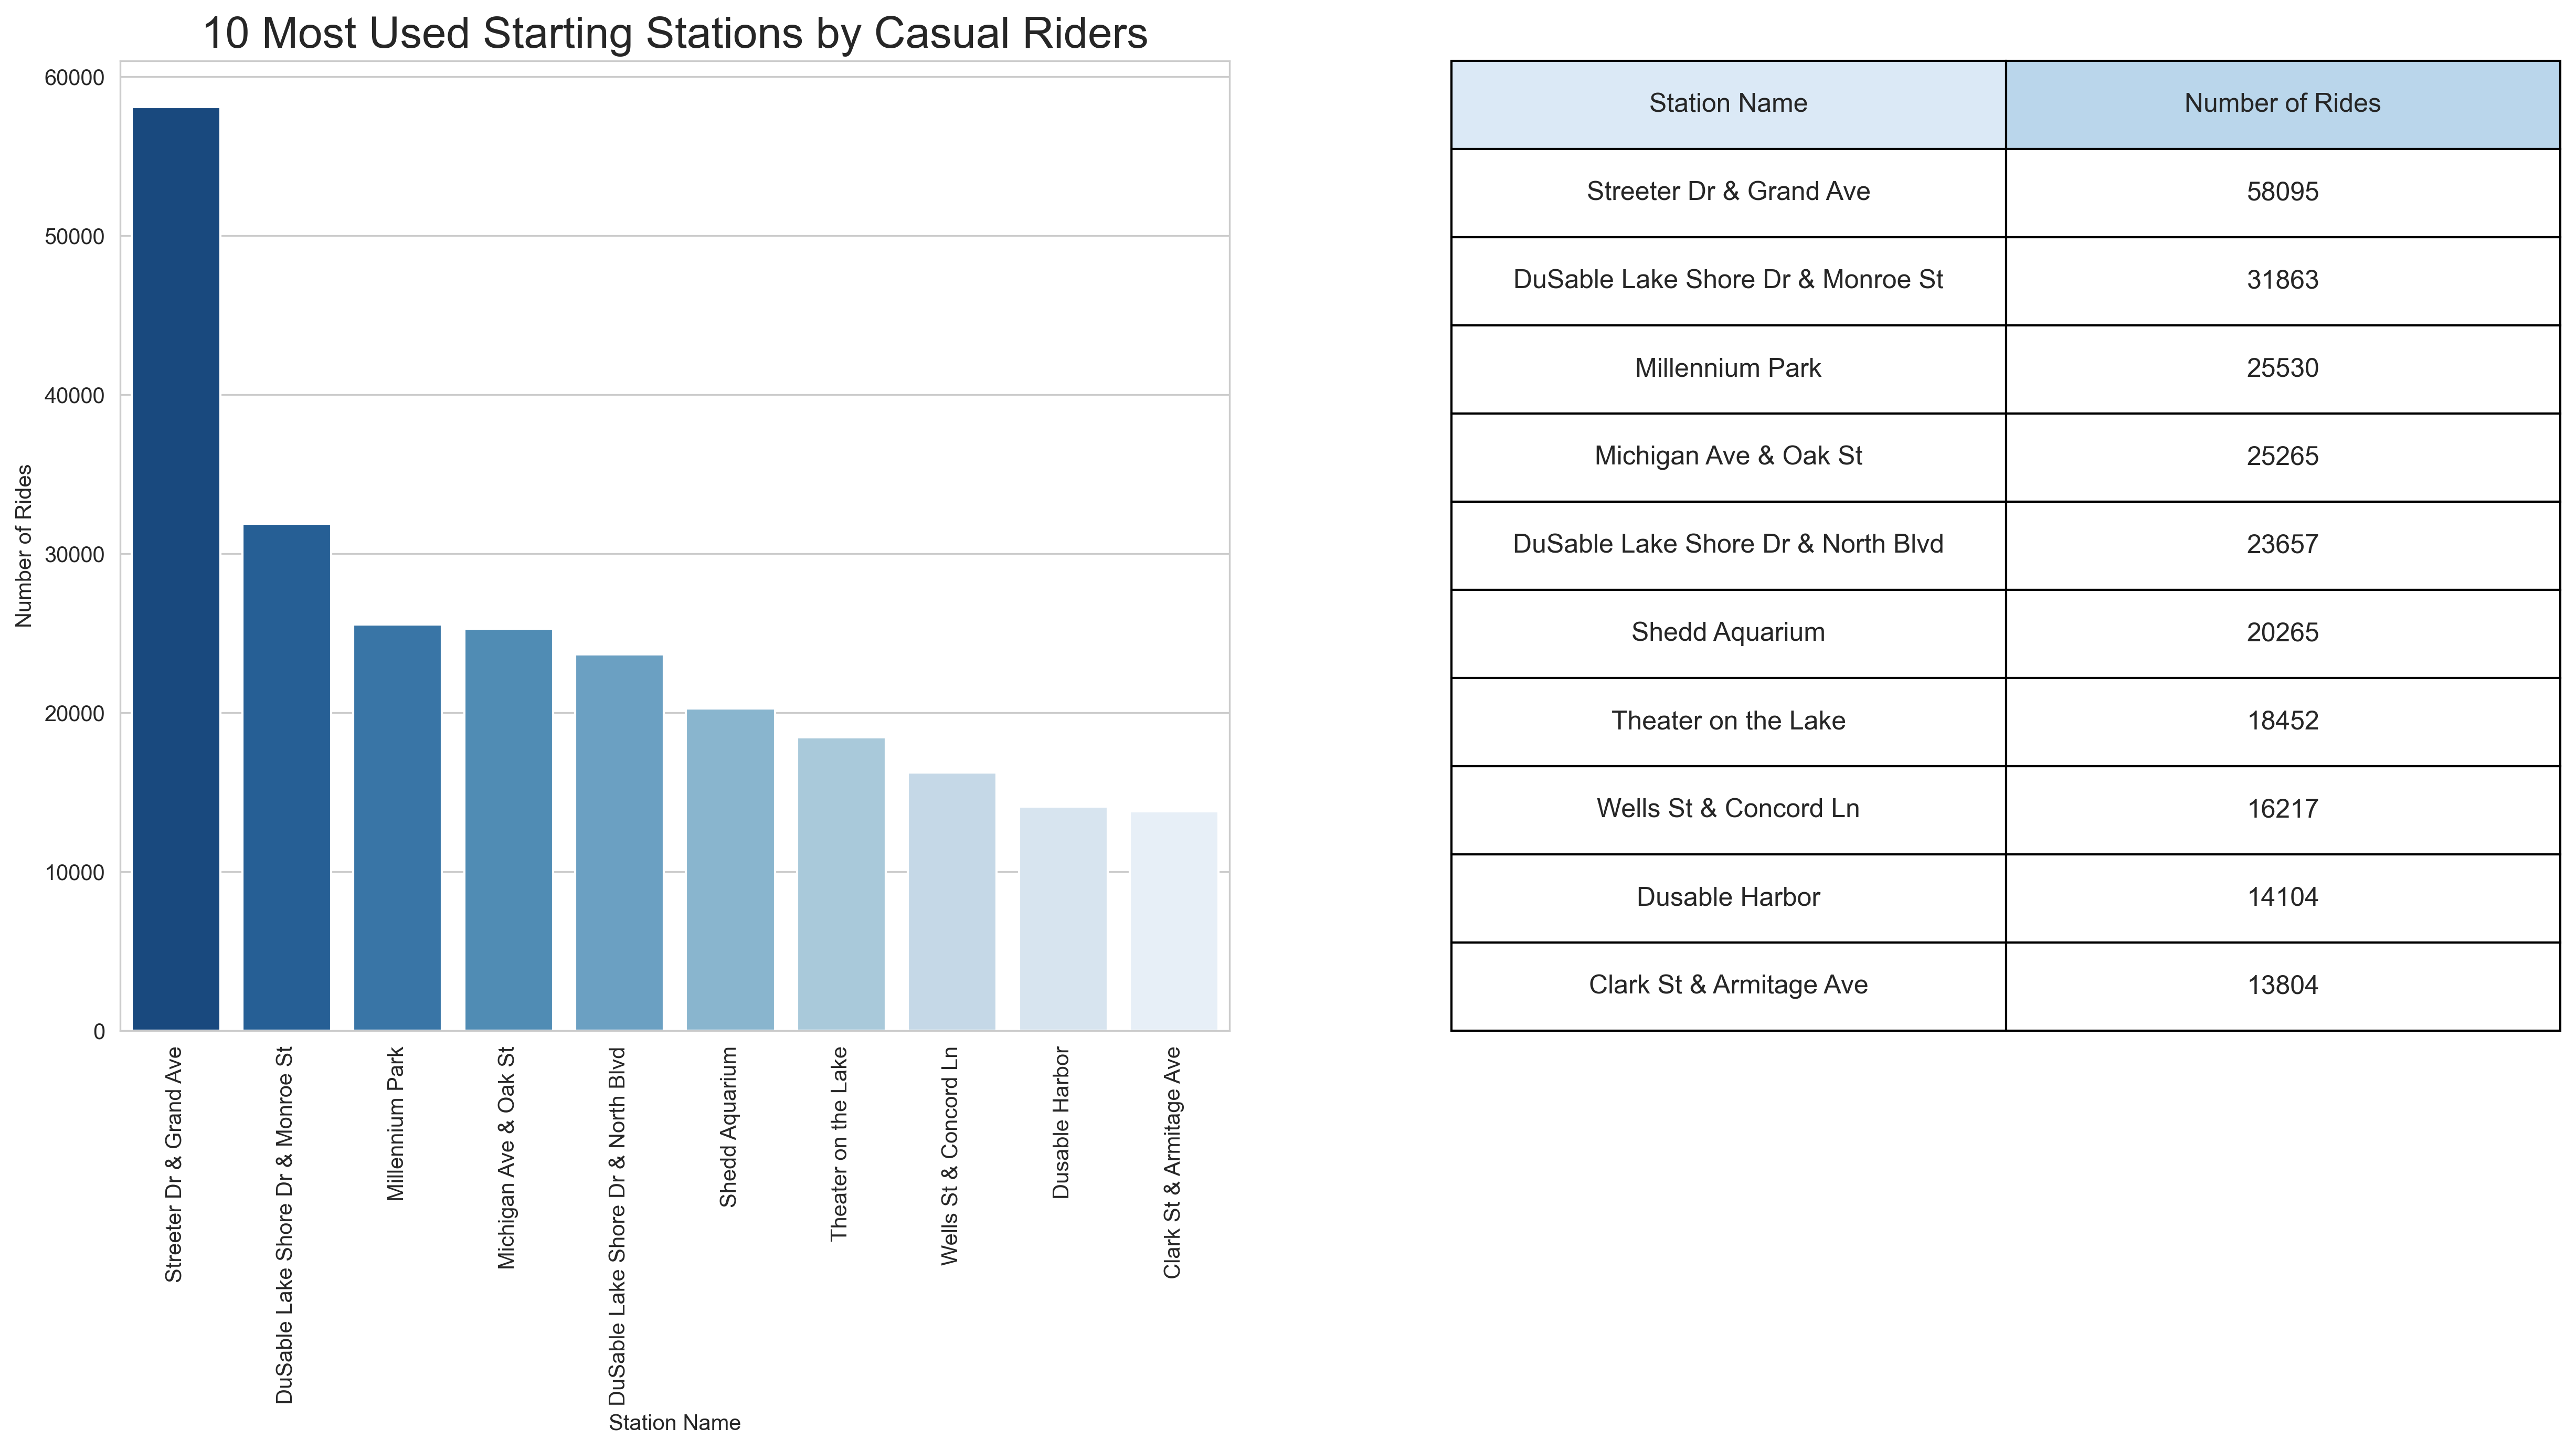

In [129]:
data = data_2022[data_2022['member_casual']=='casual']['start_station_name'].value_counts()[:10].reset_index()
fig = plt.figure(figsize=(20,8), dpi = 300)
rank = data['start_station_name'].argsort()
pal = sns.color_palette(plot_color, len(data))

ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x = 'index', y = 'start_station_name', data = data, palette = np.array(pal)[rank])

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = data.values, cellLoc = 'center', rowLabels = None, bbox=bbox, colLabels=['Station Name', 'Number of Rides'],  colColours = sns.color_palette(plot_color))
mpl_table.auto_set_font_size(True)
mpl_table.set_fontsize(font_size)
ticks = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# _ = ax2.set_xticklabels(ax2.get_xticklabels())
ax1.set_title(label = '10 Most Used Starting Stations by Casual Riders', fontsize = 20)
tx = ax1.set_xlabel(xlabel = 'Station Name')
ty = ax1.set_ylabel(ylabel = 'Number of Rides')

* Streeter Dr & Grand Ave was number 1 starting station for Casual Riders

## L) Number of Rides by Ride Type vs Member Type

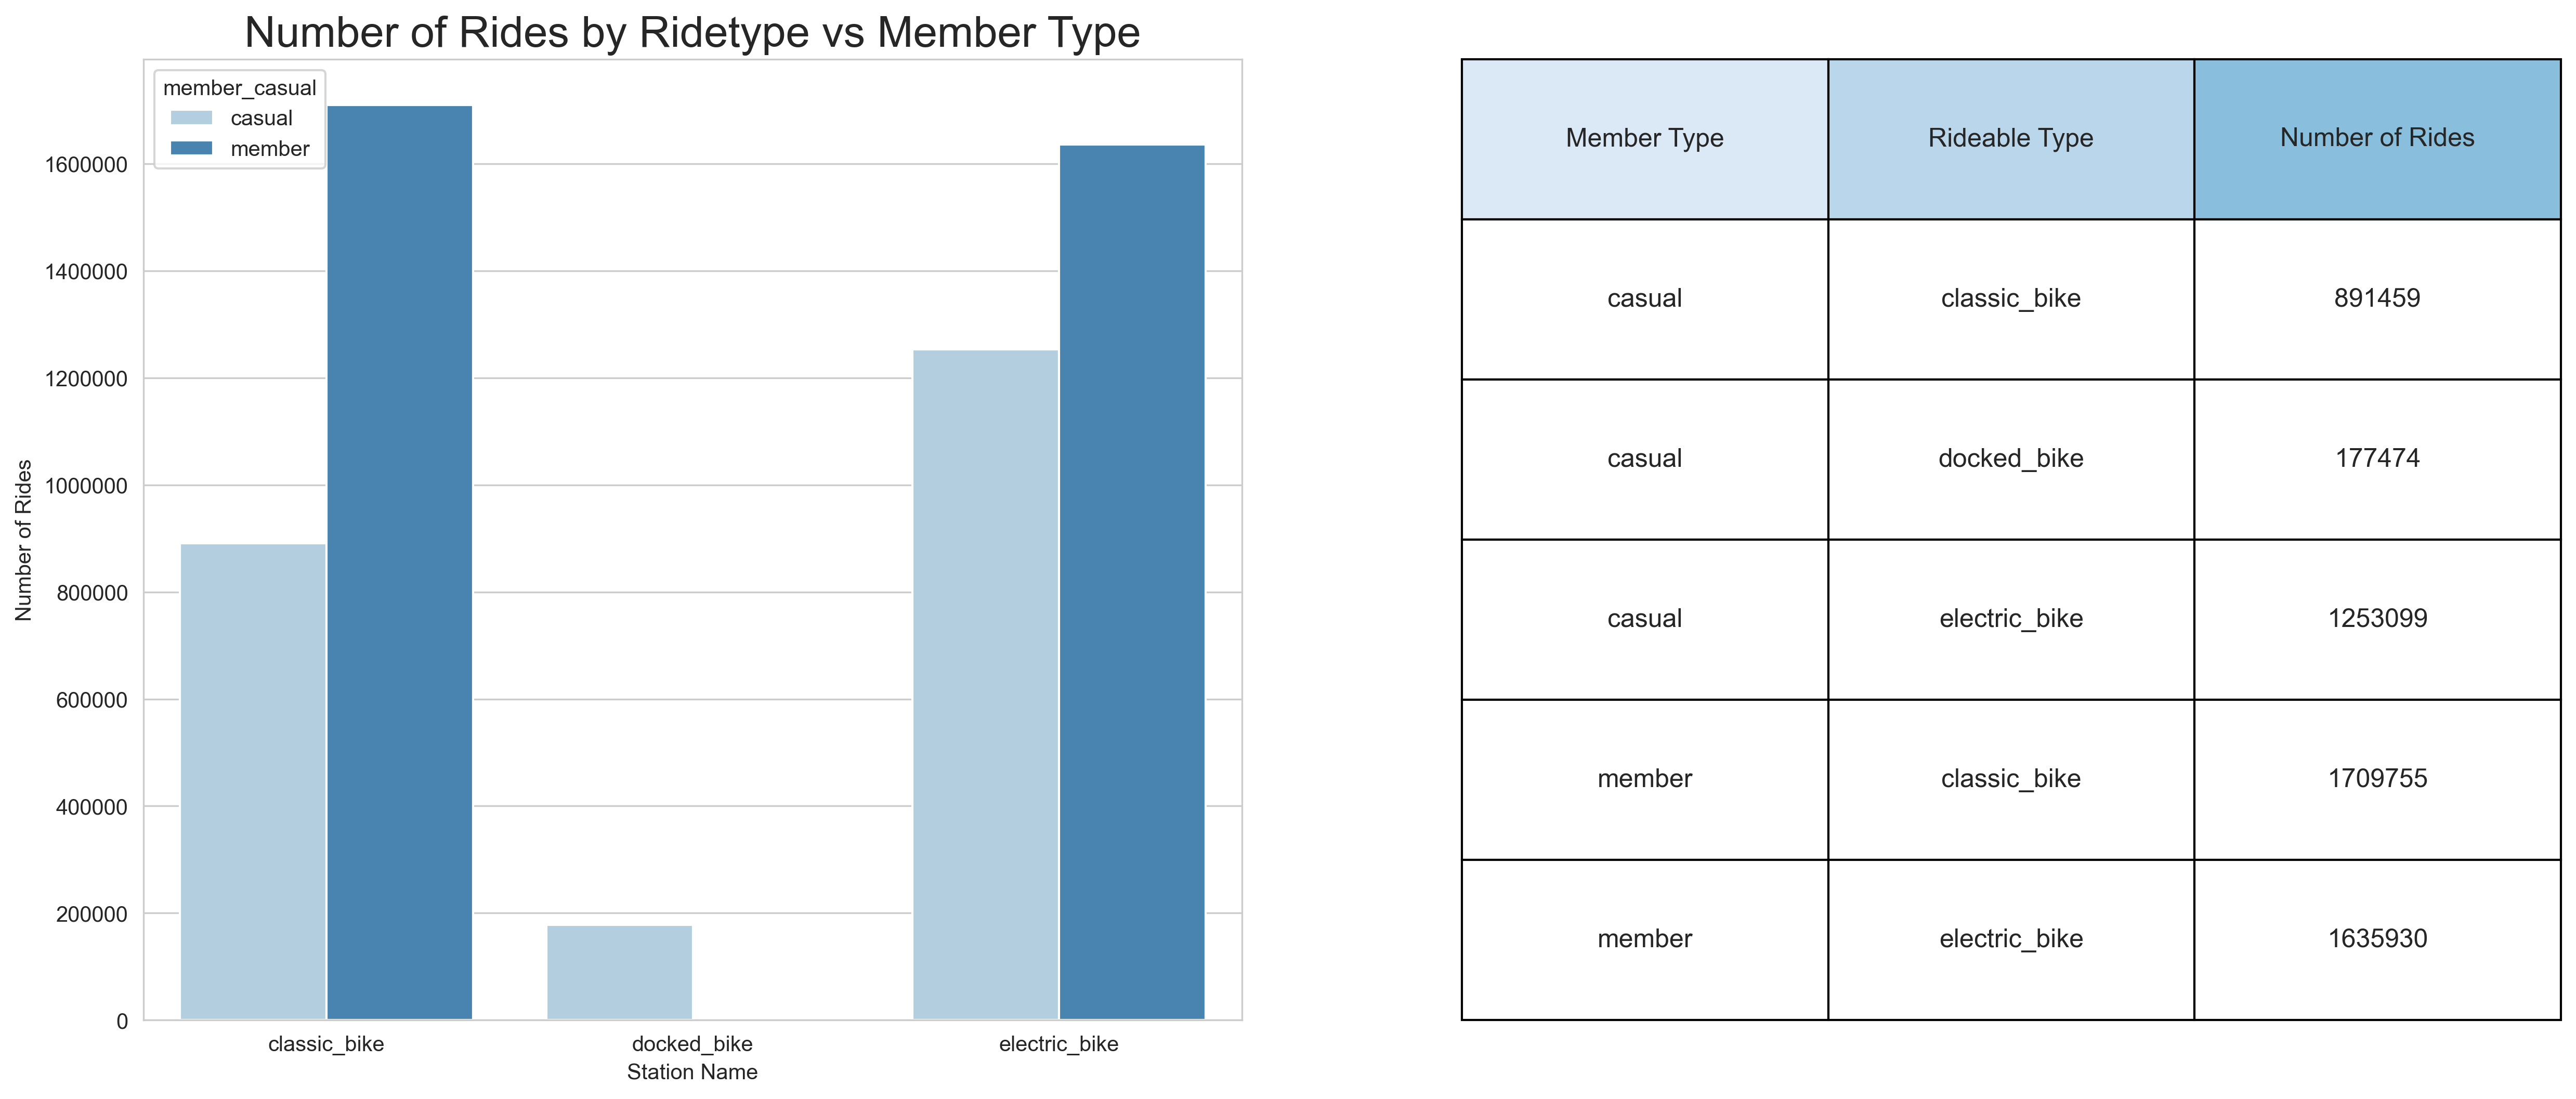

In [136]:
data = data_2022.groupby(['member_casual', 'rideable_type']).size().reset_index()
data.columns = ['member_casual', 'rideable_type', 'Number of Rides']
formatter.set_scientific(False)
formatter.set_powerlimits((-2, 2))
fig = plt.figure(figsize=(20,8), dpi = 300)
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x = 'rideable_type', y = 'Number of Rides', data = data, hue = 'member_casual', palette=sns.color_palette(plot_color, 2))
ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = data.values, cellLoc = 'center', rowLabels = None, bbox=bbox, colLabels=['Member Type', 'Rideable Type', 'Number of Rides'],  colColours = sns.color_palette(plot_color))
mpl_table.auto_set_font_size(True)
mpl_table.set_fontsize(font_size)
xticks = ax1.set_xticklabels(ax1.get_xticklabels())
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title(label = 'Number of Rides by Ridetype vs Member Type', fontsize = 20)
tx = ax1.set_xlabel(xlabel = 'Station Name')
ty = ax1.set_ylabel(ylabel = 'Number of Rides')

* It appears that Member riders and Casual riders prefer Classic and Electric bike over Docked Bike.
* No Member riders used the docked bike (Need to dig deeper)

## M) Average Trip Duration by Ride Type vs Member Type

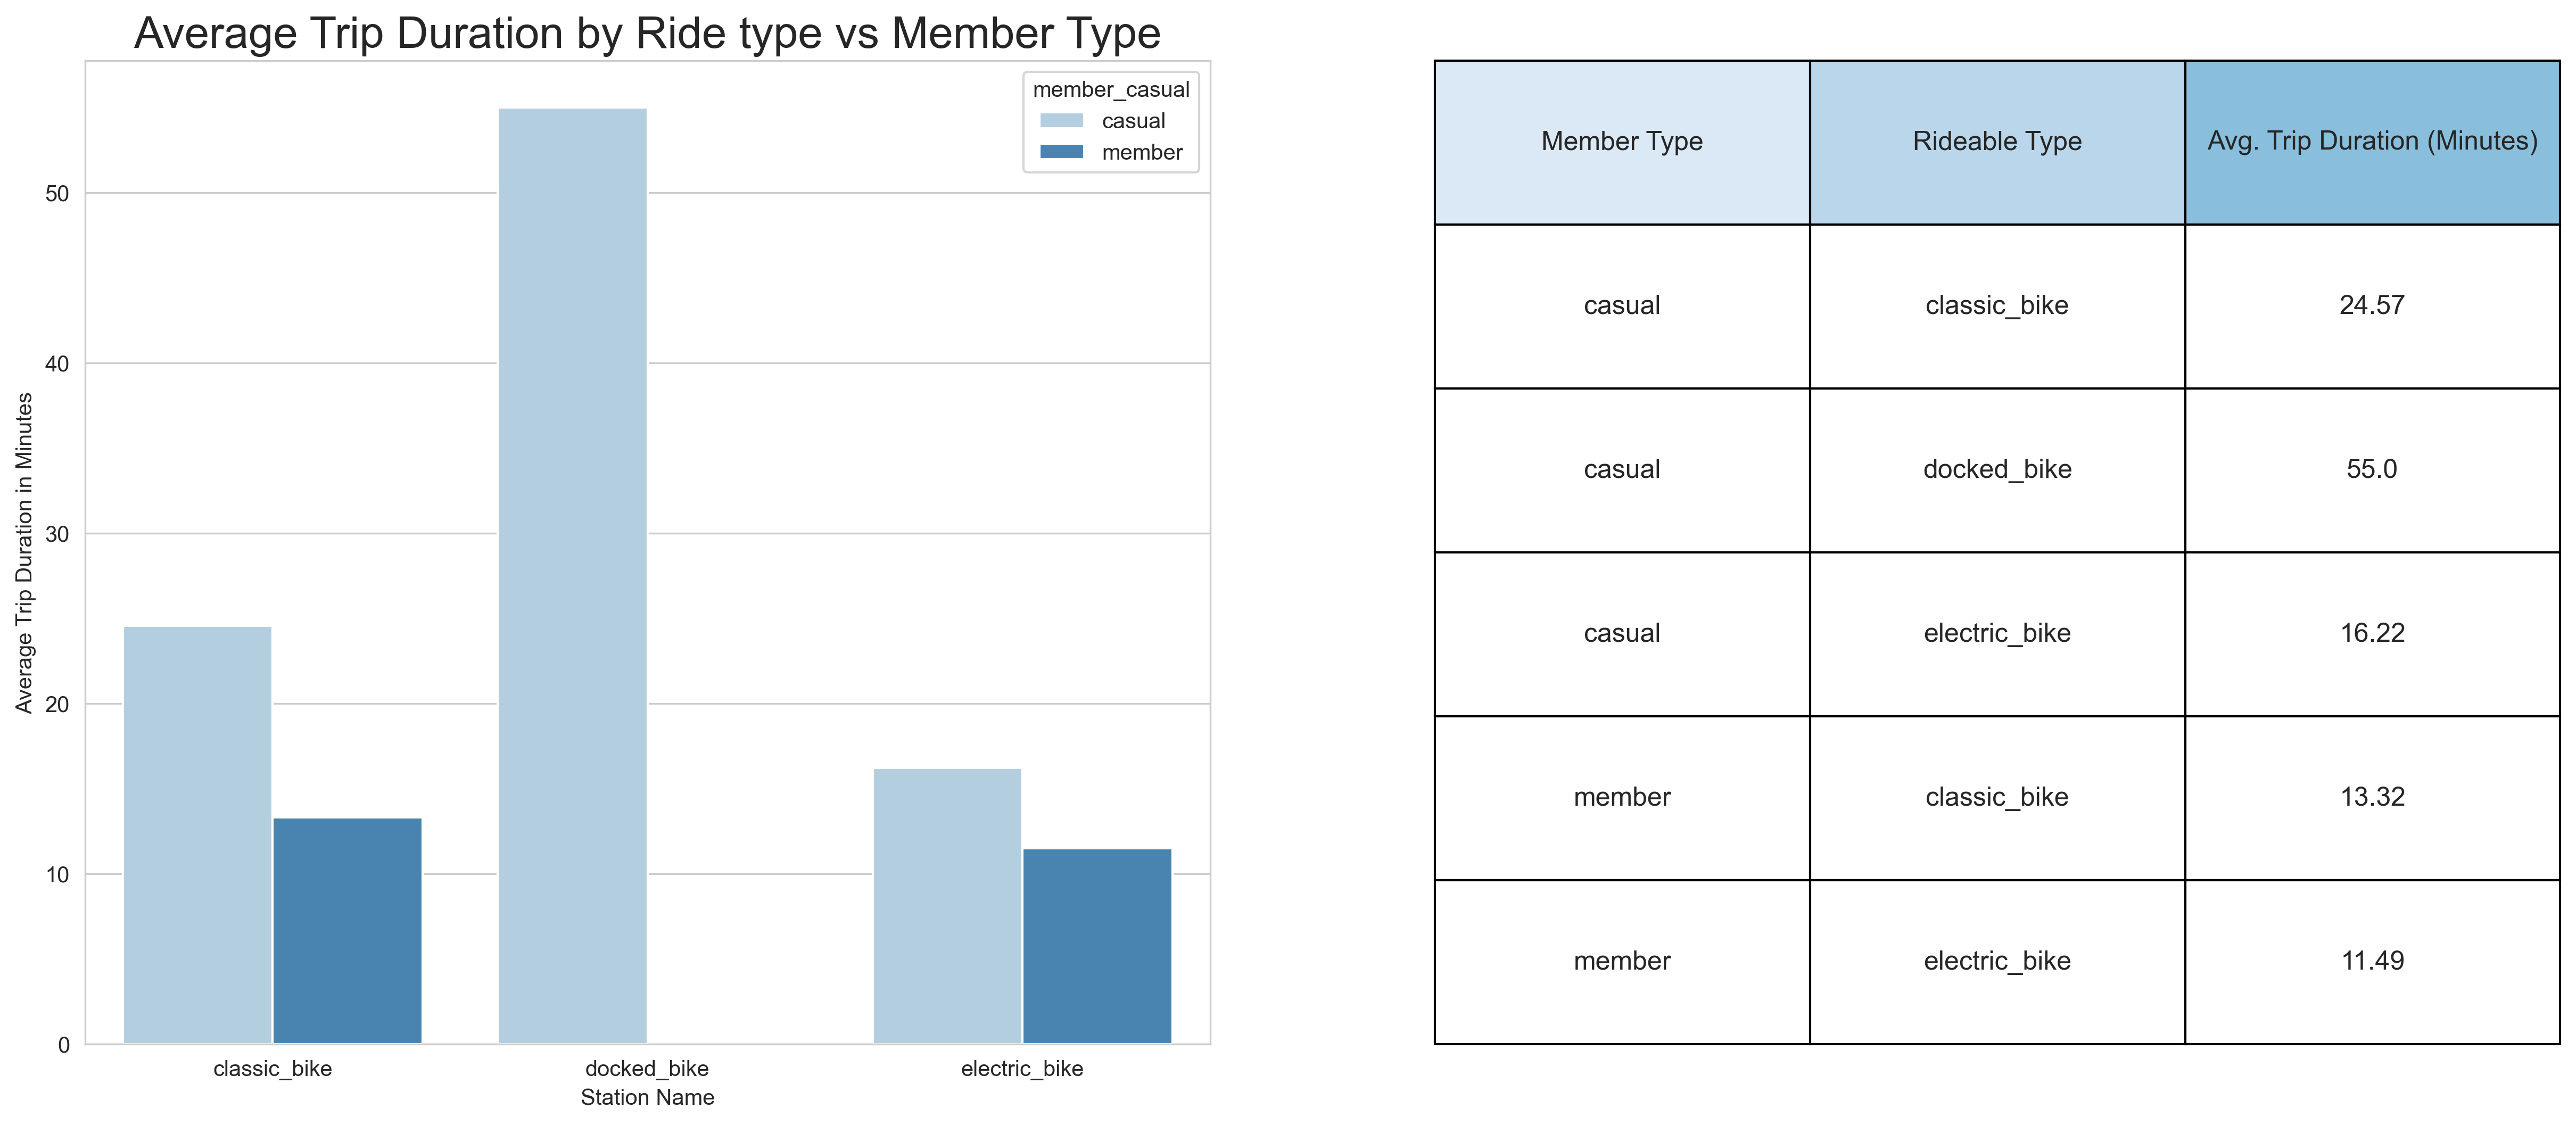

In [139]:
data = data_2022.groupby(['member_casual', 'rideable_type']).agg('mean').round(2).reset_index()
data = data[['member_casual', 'rideable_type', 'ride_length']]
formatter.set_scientific(False)
formatter.set_powerlimits((-2, 2))
fig = plt.figure(figsize=(20,8), dpi = 300)
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x = 'rideable_type', y = 'ride_length', data = data, hue = 'member_casual', palette=sns.color_palette(plot_color, 2))
ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = data.values, cellLoc = 'center', rowLabels = None, bbox=bbox, colLabels=['Member Type', 'Rideable Type', 'Avg. Trip Duration (Minutes)'],  colColours = sns.color_palette(plot_color))
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
xticks = ax1.set_xticklabels(ax1.get_xticklabels())
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title(label = 'Average Trip Duration by Ride type vs Member Type', fontsize = 20)
tx = ax1.set_xlabel(xlabel = 'Station Name')
ty = ax1.set_ylabel(ylabel = 'Average Trip Duration in Minutes')

* Average ride_length of Casual riders is far greater than the average ride_lengh of Member riders.
* On an average casual riders used docked bike for 55 minutes.

## N) Number of Rides by Ride Type vs Member Type

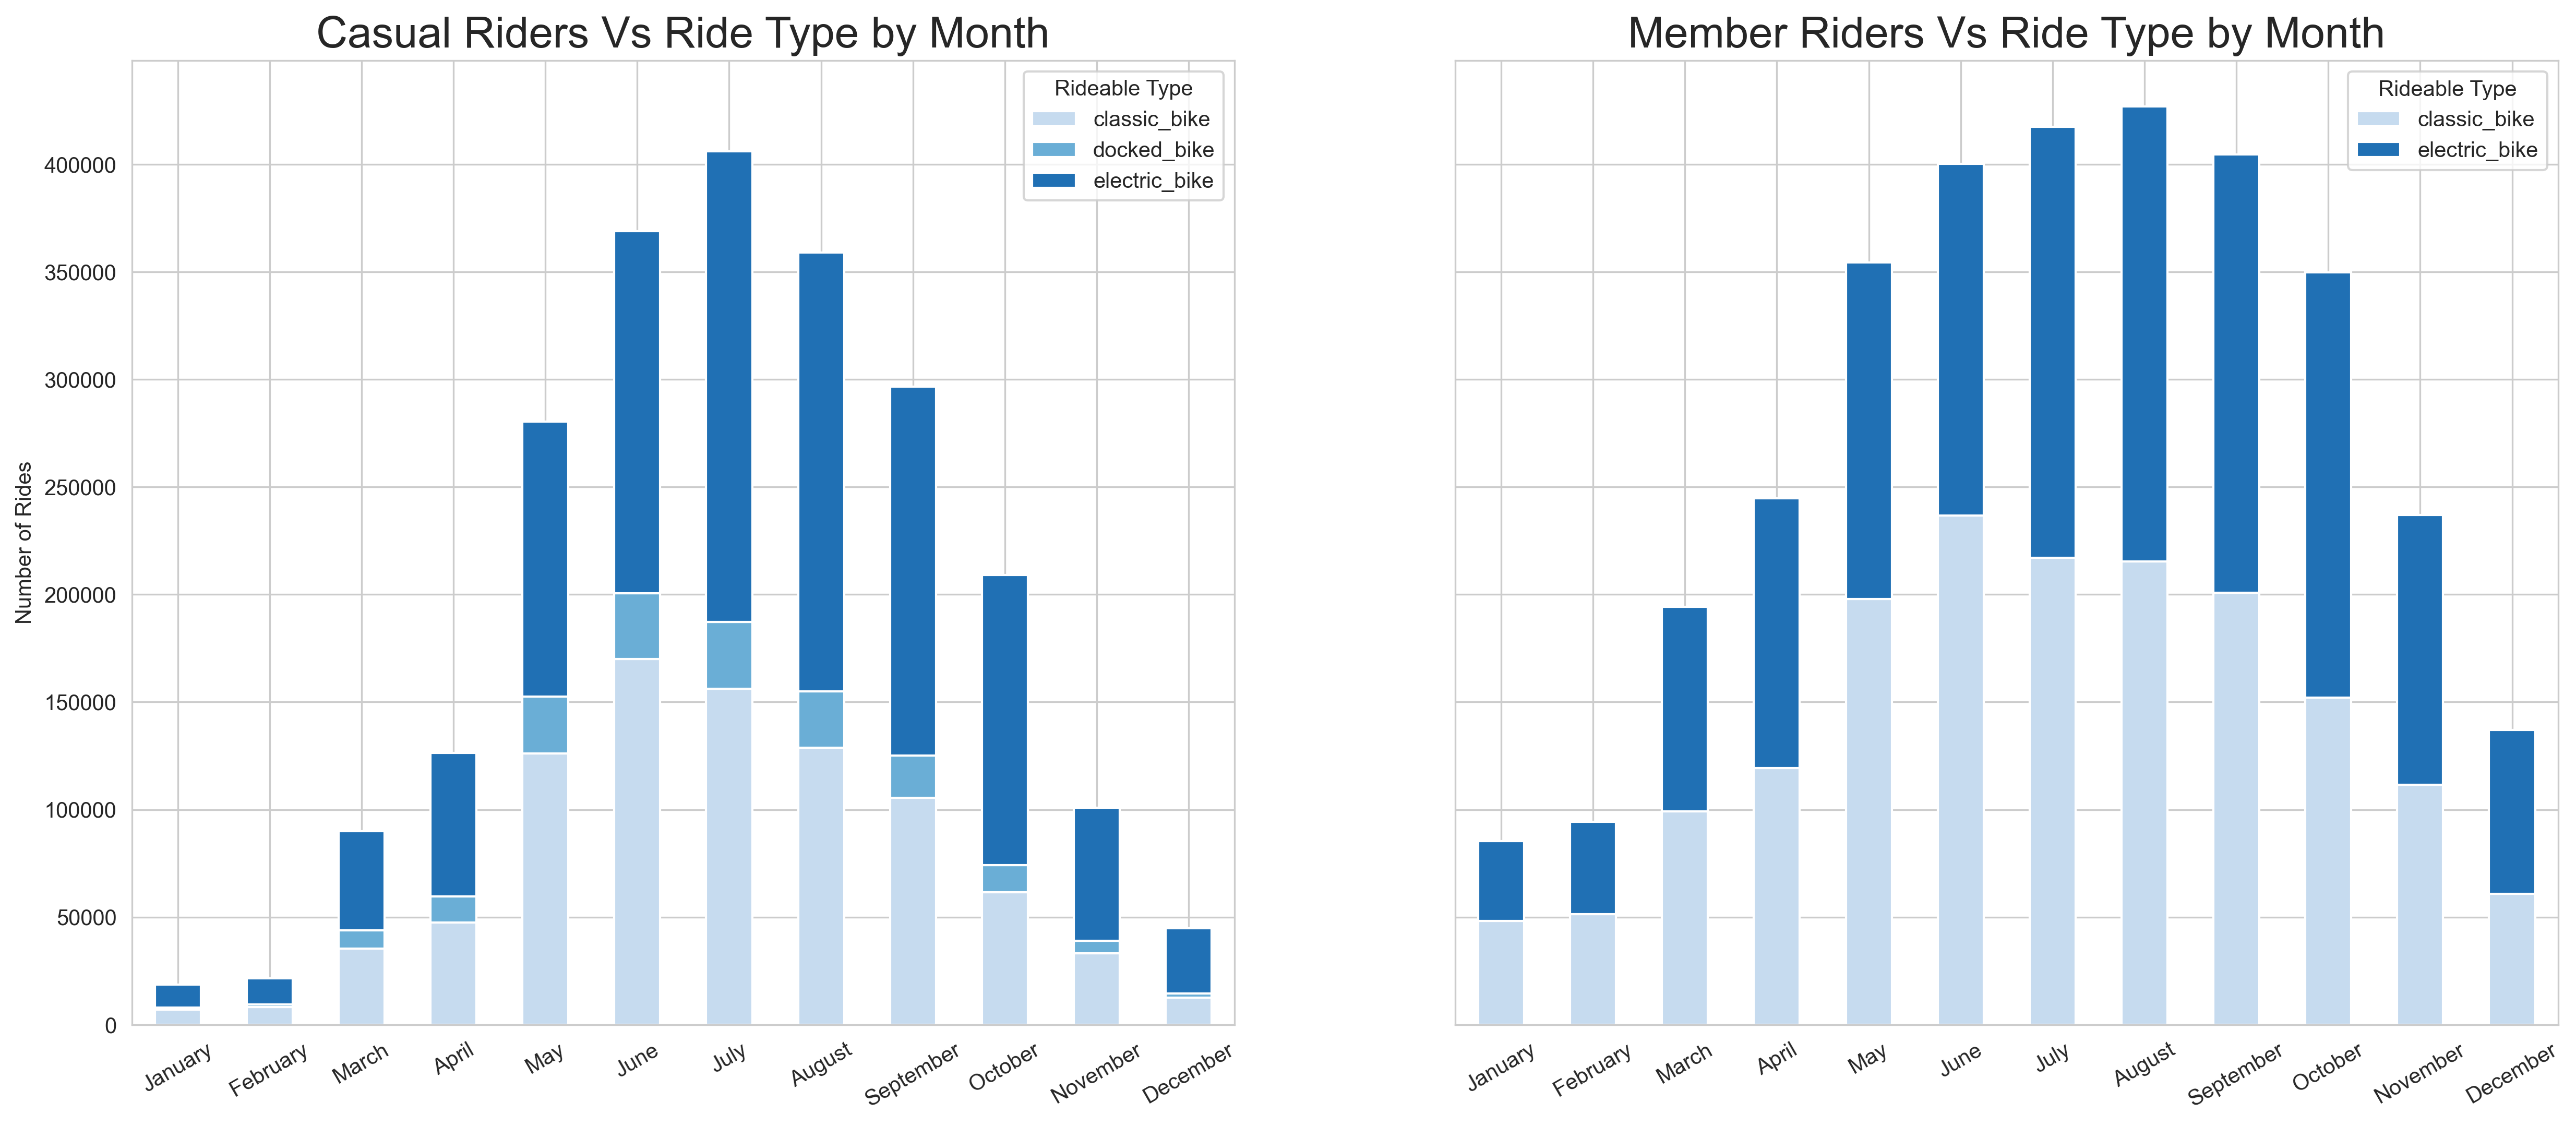

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), dpi = 300, sharey = True)
data = data_2022[data_2022['member_casual']=='casual'].groupby(['rideable_type', 'month']).size().reset_index()
data.columns = ['rideable_type', 'month', 'Number of Rides']
pv = data.pivot_table(index = 'month', columns = 'rideable_type', values = 'Number of Rides')
pv.plot(kind = 'bar', stacked = True, color = sns.color_palette(plot_color, 3), ax = ax1)
ax1.set_title(label = 'Casual Riders Vs Ride Type by Month', fontsize = 20)
t1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
ax1.set_xlabel(xlabel = None)
ax1.set_ylabel(ylabel = 'Number of Rides')
ax1.legend(title = 'Rideable Type')
data = data_2022[data_2022['member_casual']=='member'].groupby(['rideable_type', 'month']).size().reset_index()
data.columns = ['rideable_type', 'month', 'Number of Rides']
pv = data.pivot_table(index = 'month', columns = 'rideable_type', values = 'Number of Rides')
pv.plot(kind = 'bar', stacked = True, color = [sns.color_palette('Blues', 3)[0], sns.color_palette(plot_color, 3)[2]], ax = ax2)
ax2.set_title(label = 'Member Riders Vs Ride Type by Month', fontsize = 20)
t2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
ax2.set_xlabel(xlabel = None)
ax2.set_ylabel(ylabel = 'Number of Rides')
l = ax2.legend(title = 'Rideable Type')

* During the month of December, January & February Casual riders prefer classic and electric bikes over docked bikes
* Casual and Member riders both prefer classic and electric bikes equally.

## O) Casual Riders: Number of Rides by Ride Type and Hour of the Day

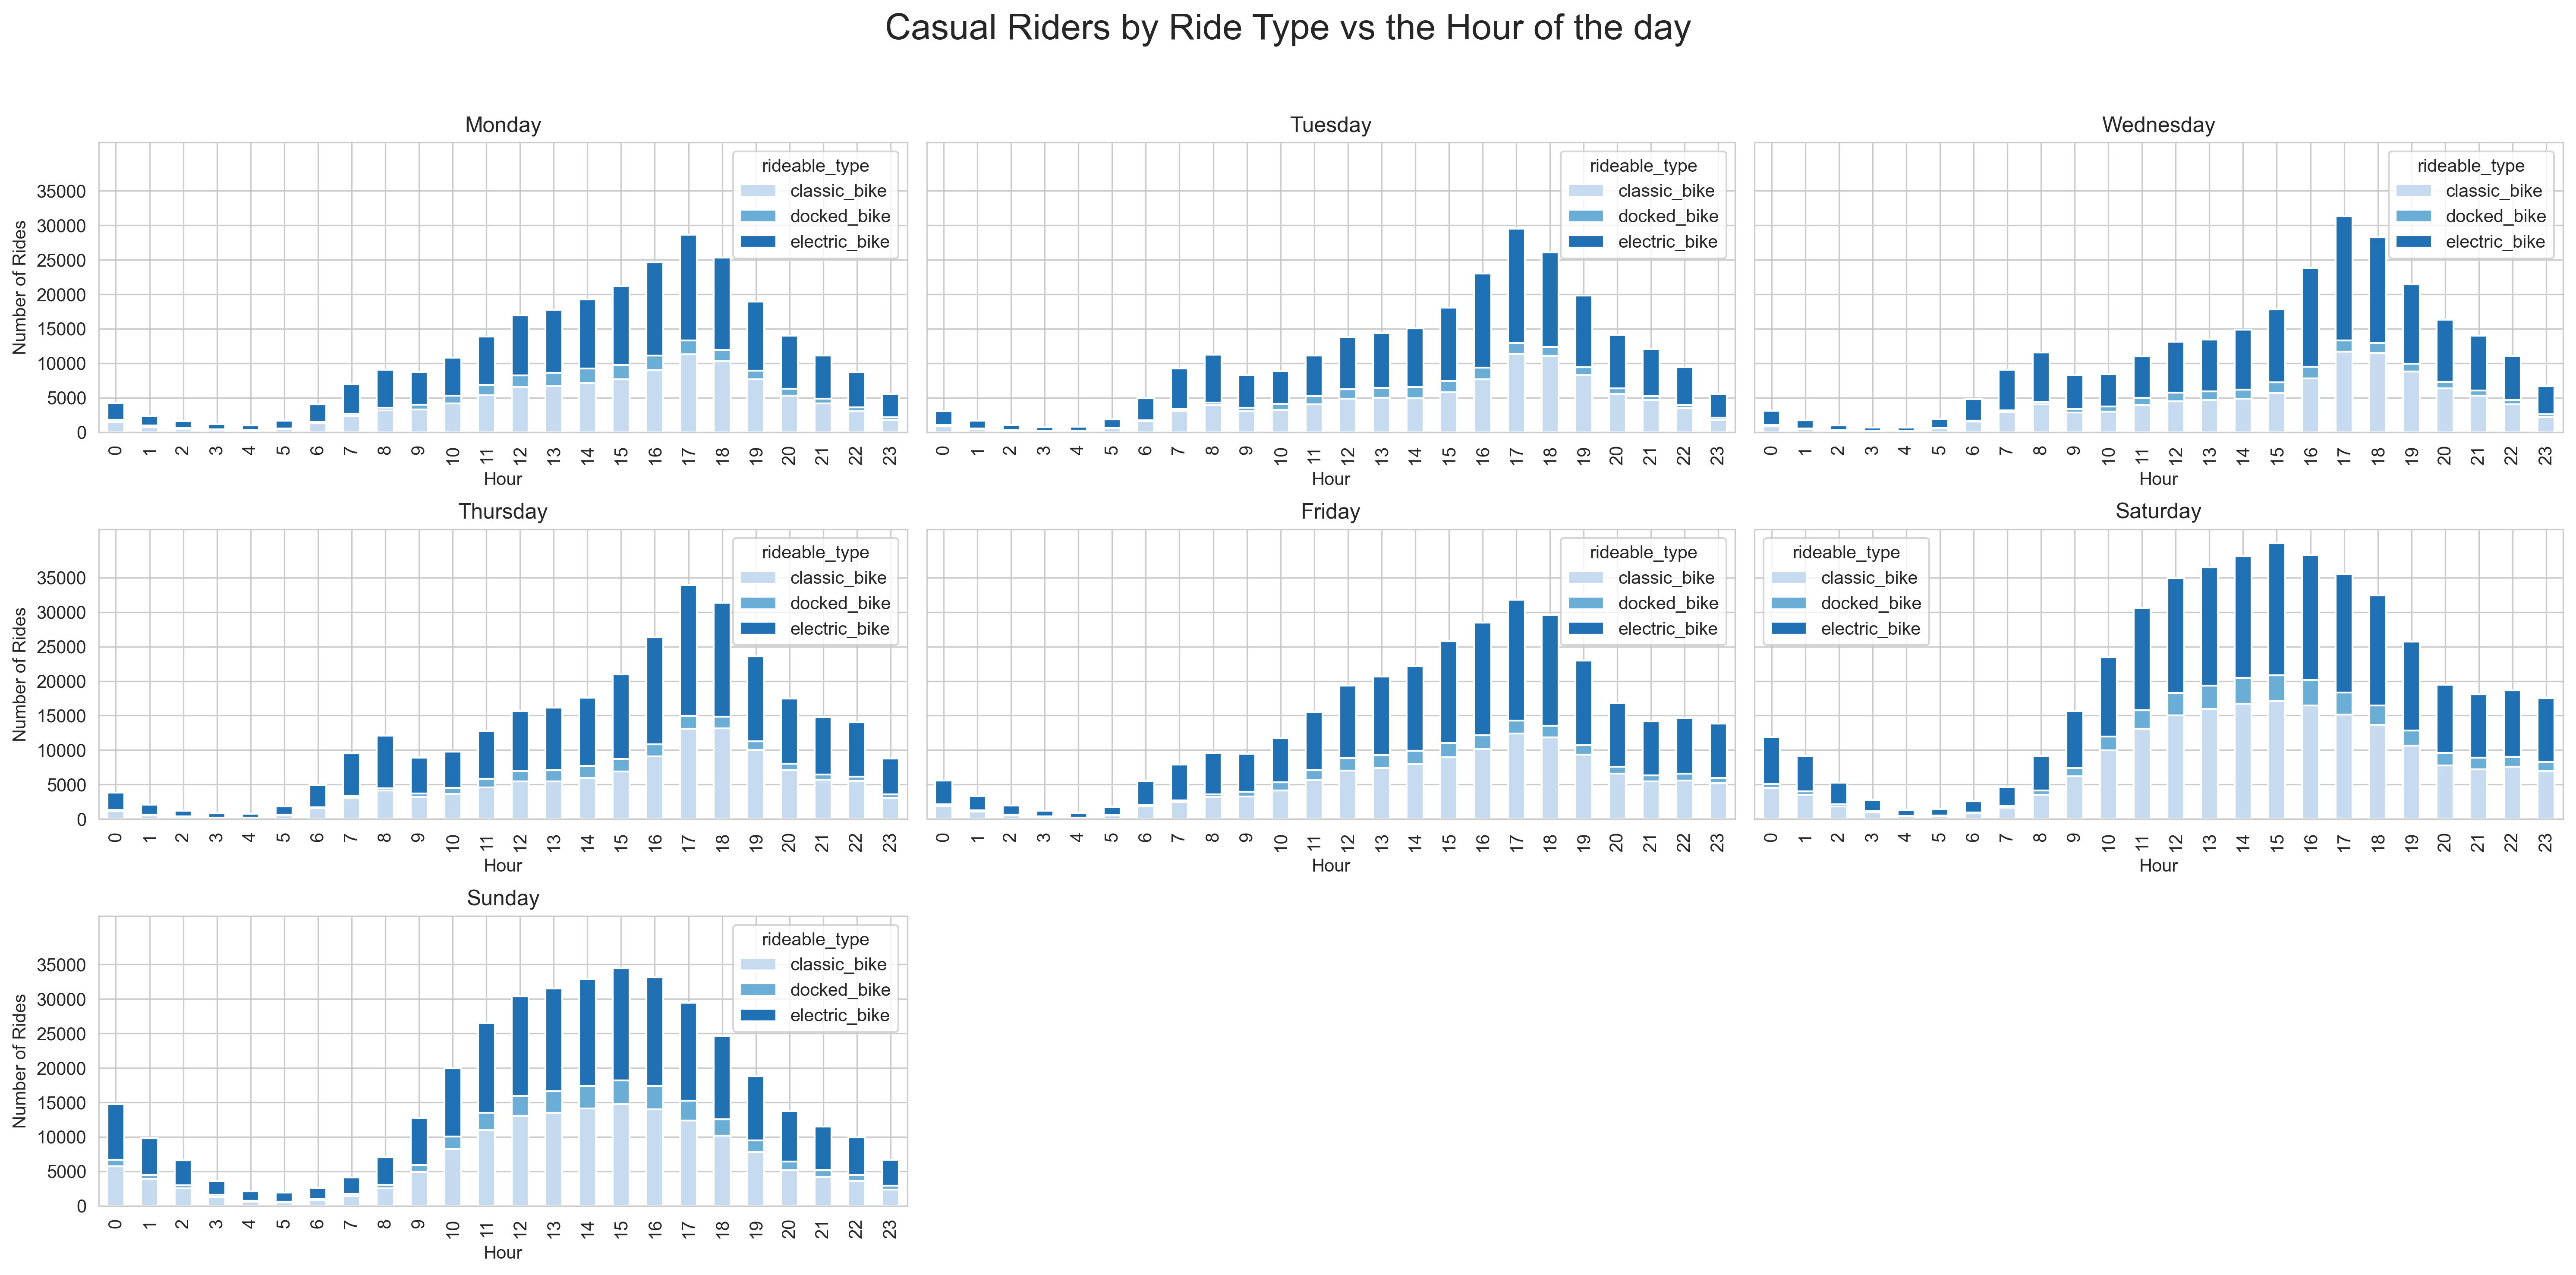

In [124]:
data = data_2022[data_2022['member_casual']=='casual'].groupby(['rideable_type', 'hour', 'day']).size().reset_index()
data.columns = ['rideable_type', 'hour', 'day', 'Number of Rides']
fig, axes = plt.subplots(3, 3, figsize=(20,10), dpi = 300, sharey = True)
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.suptitle('Casual Riders by Ride Type vs the Hour of the day', fontsize = 20)

for day,ax in zip(data['day'].unique(), axes[:-2]):
    pv = data[data['day'] == day].pivot_table(index = 'hour', columns = 'rideable_type', values = 'Number of Rides')
    pv.plot(kind = 'bar', stacked = True, color = sns.color_palette(plot_color, 3), ax = ax)
    ax.set_title(label = day, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
    ax.set_yticks(ticks = ax.get_yticks(), fontsize = 10)
    ax.set_xlabel(xlabel = 'Hour', fontsize = 10)
    ax.set_ylabel(ylabel = 'Number of Rides', fontsize = 10)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

* No specific preference can be seen by the hour of the day.
* On work days maximum number of rides for casual riders can be seen at 5 pm.
* On weekends maximum number of rides for casual riders can be seen at 3 pm.

## P) Member Riders: Number of Rides by Ride Type and Hour of the Day

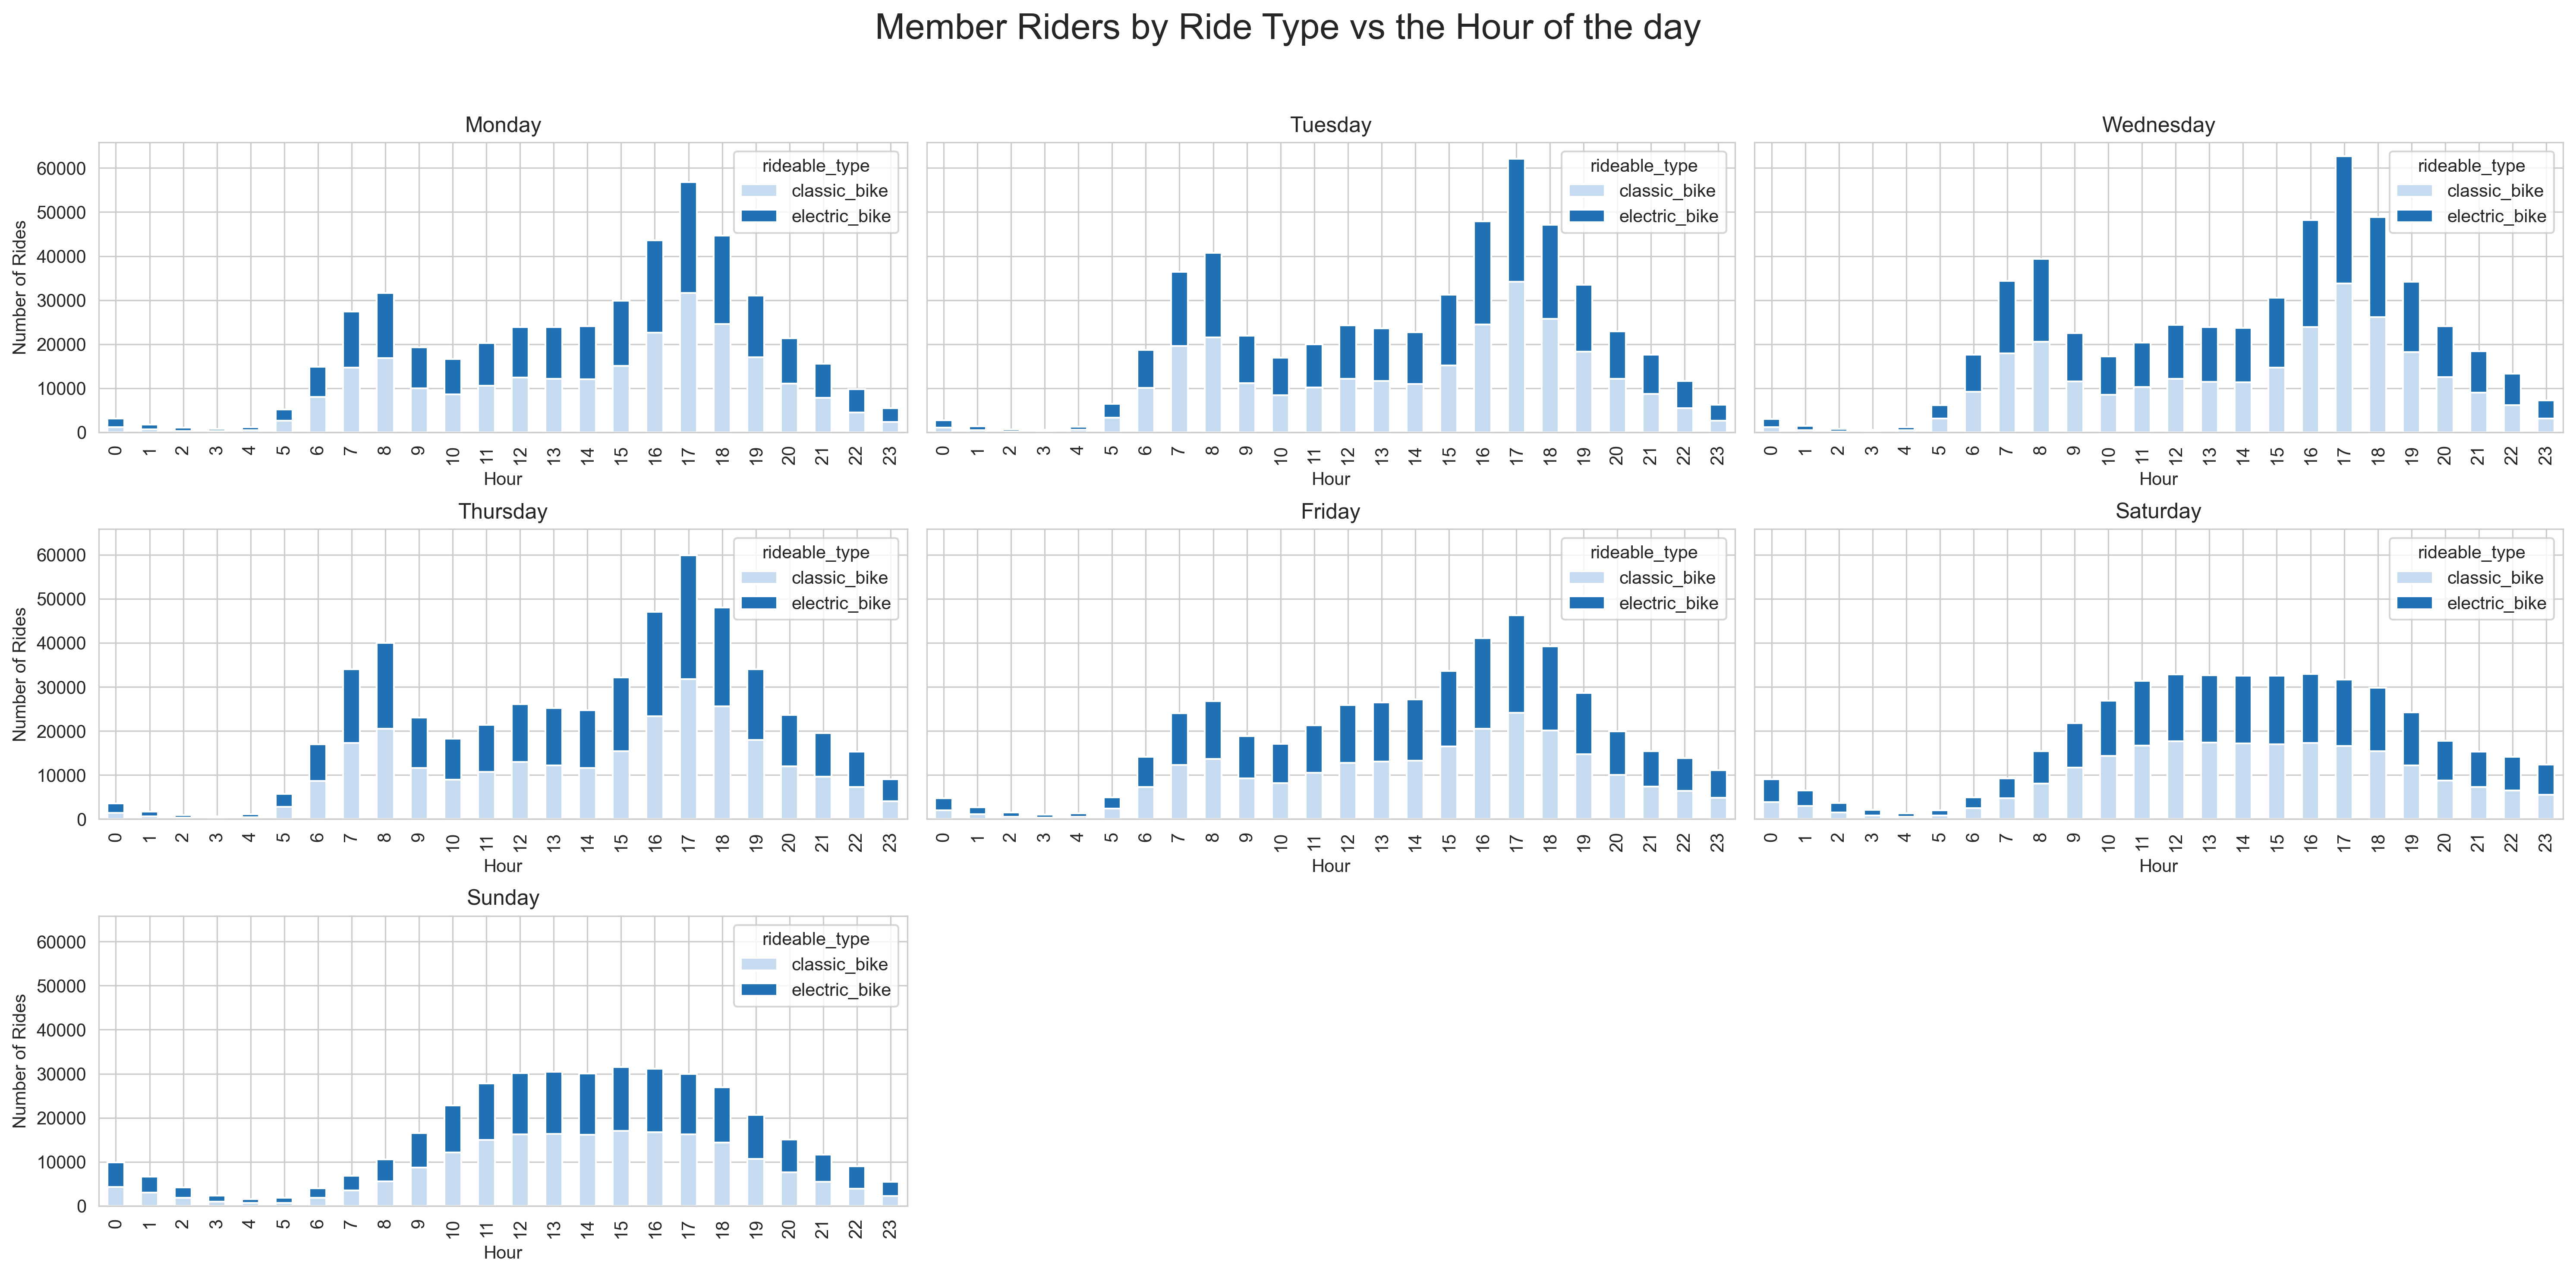

In [125]:
data = data_2022[data_2022['member_casual']=='member'].groupby(['rideable_type', 'hour', 'day']).size().reset_index()
data.columns = ['rideable_type', 'hour', 'day', 'Number of Rides']
fig, axes = plt.subplots(3, 3, figsize=(20,10), dpi = 300, sharey = True)
pal = sns.color_palette(plot_color, 3)
axes = axes.flatten()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.suptitle('Member Riders by Ride Type vs the Hour of the day', fontsize = 20)

for day,ax in zip(data['day'].unique(), axes[:-2]):
    pv = data[data['day'] == day].pivot_table(index = 'hour', columns = 'rideable_type', values = 'Number of Rides')
    pv.plot(kind = 'bar', stacked = True, color = [pal[0], pal[2]], ax = ax)
    ax.set_title(label = day, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
    ax.set_yticks(ticks = ax.get_yticks(), fontsize = 10)
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize = 10)
    ax.set_xlabel(xlabel = 'Hour', fontsize = 10)
    ax.set_ylabel(ylabel = 'Number of Rides', fontsize = 10)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

* No specific preference can be seen by the hour of the day.
* On work days maximum number of rides for Member riders can be seen at 5 pm.
* On weekends maximum number of rides for Member riders can be seen at 12 to 6 pm.

## Q)

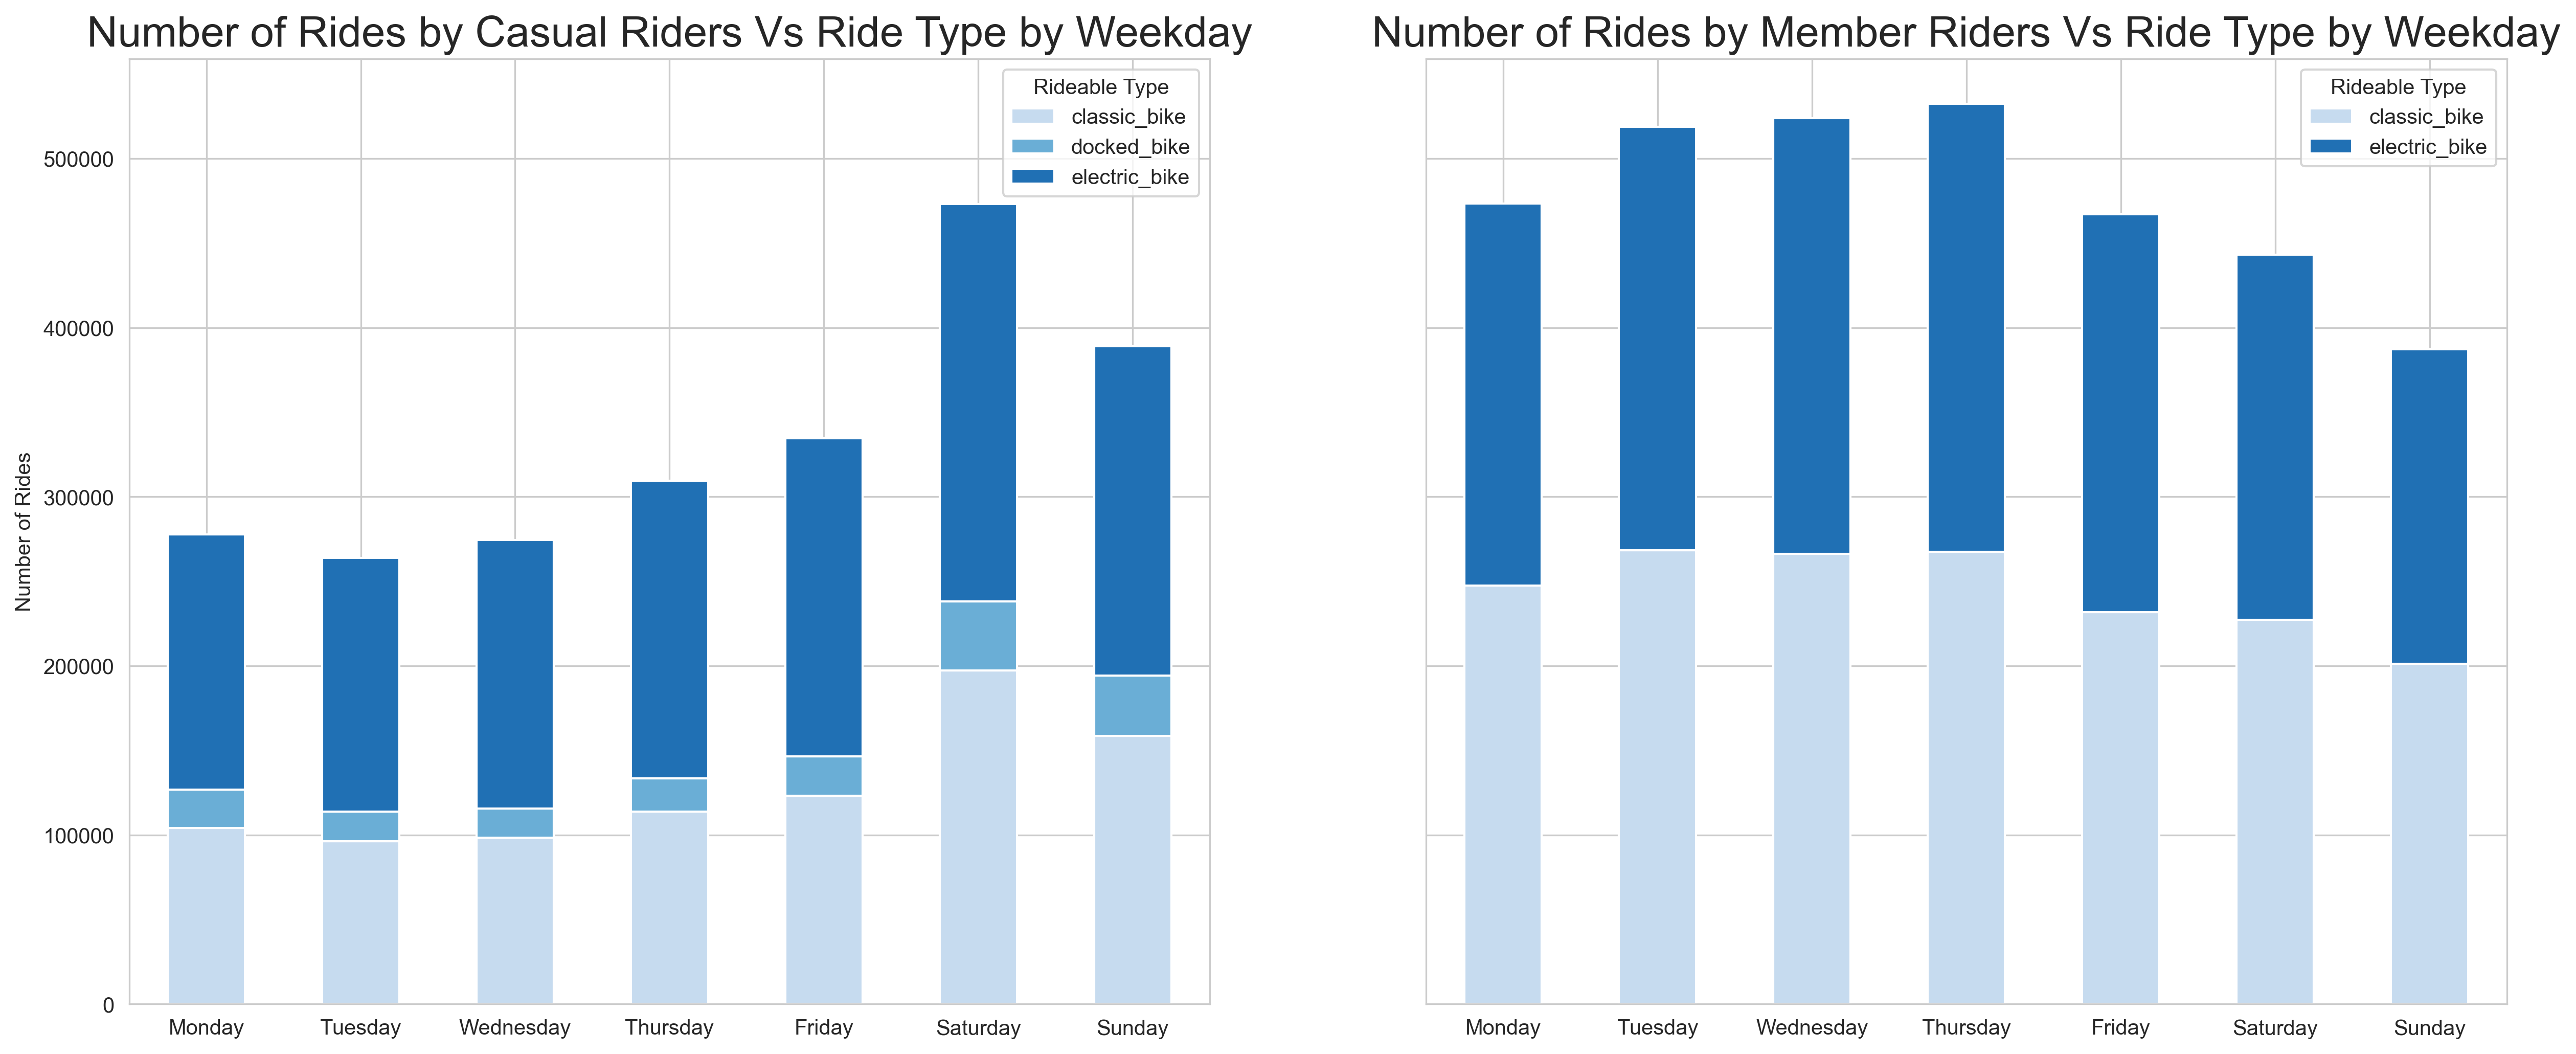

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), dpi = 300, sharey = True)
data = data_2022[data_2022['member_casual']=='casual'].groupby(['rideable_type', 'day']).size().reset_index()
data.columns = ['rideable_type', 'day', 'Number of Rides']
pv = data.pivot_table(index = 'day', columns = 'rideable_type', values = 'Number of Rides')
pv.plot(kind = 'bar', stacked = True, color = sns.color_palette(plot_color, 3), ax = ax1)
ax1.set_title(label = 'Number of Rides by Casual Riders Vs Ride Type by Weekday', fontsize = 20)
t1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_xlabel(xlabel = None)
ax1.set_ylabel(ylabel = 'Number of Rides')
ax1.legend(title = 'Rideable Type')
data = data_2022[data_2022['member_casual']=='member'].groupby(['rideable_type', 'day']).size().reset_index()
data.columns = ['rideable_type', 'day', 'Number of Rides']
pv = data.pivot_table(index = 'day', columns = 'rideable_type', values = 'Number of Rides')
pv.plot(kind = 'bar', stacked = True, color = [sns.color_palette('Blues', 3)[0], sns.color_palette(plot_color, 3)[2]], ax = ax2)
ax2.set_title(label = 'Number of Rides by Member Riders Vs Ride Type by Weekday', fontsize = 20)
t2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0)
ax2.set_xlabel(xlabel = None)
ax2.set_ylabel(ylabel = 'Number of Rides')
nx = ax2.legend(title = 'Rideable Type')

* No specific preference can be seen by the Week day.
* Casual riders peaks on saturday.
* Member riders peaks on thursday.

#  Charts Suggested in the Case Study 1 PDF:

## A) Average ride lenght by user type

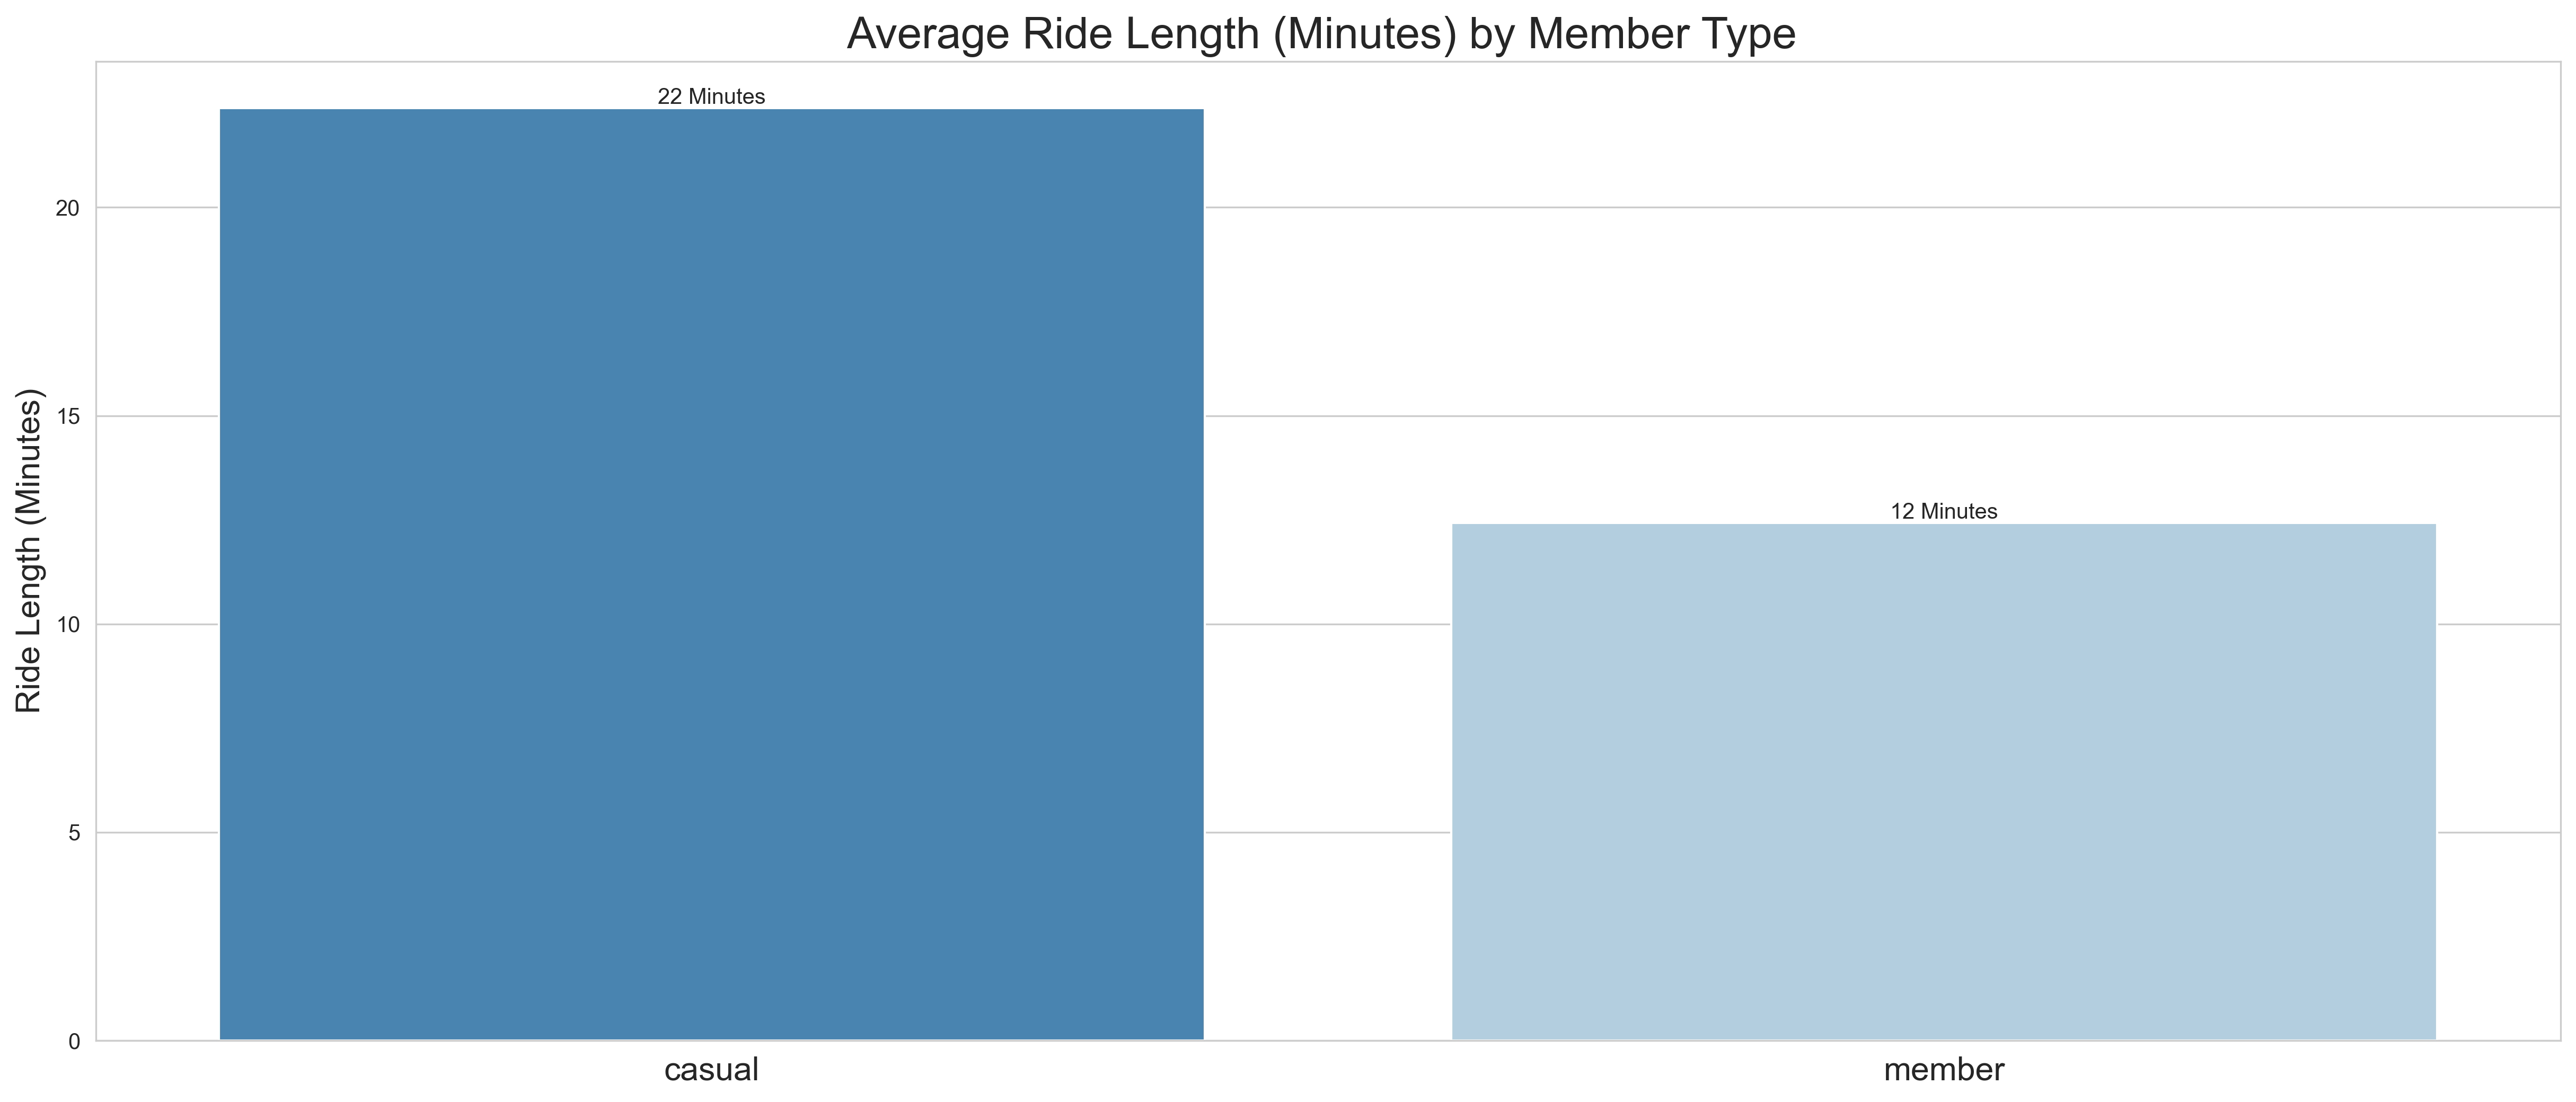

In [157]:
plt.figure(figsize=(20,8), dpi = 300)
plt.ticklabel_format(style='plain', axis='y')
data = data_2022.groupby(['member_casual']).agg('mean').reset_index()
data = data[['member_casual', 'ride_length']]
pal = sns.color_palette(plot_color, len(data))
rank = data['ride_length'].argsort()
ax = sns.barplot(x = 'member_casual', y = 'ride_length', data = data, palette= np.array(pal)[rank])
ax.set(xlabel=None)
[ax.bar_label(x, fmt = '%d Minutes', fontsize = 10) for x in ax.containers]
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
ax.set_ylabel(ylabel = 'Ride Length (Minutes)', fontsize = 15)
nx = ax.set_title(label = 'Average Ride Length (Minutes) by Member Type ', fontsize = 20)

* Average ride_length of Casual riders is almost 2x than Member riders

## B) Average ride_length by user type and day of the weeek

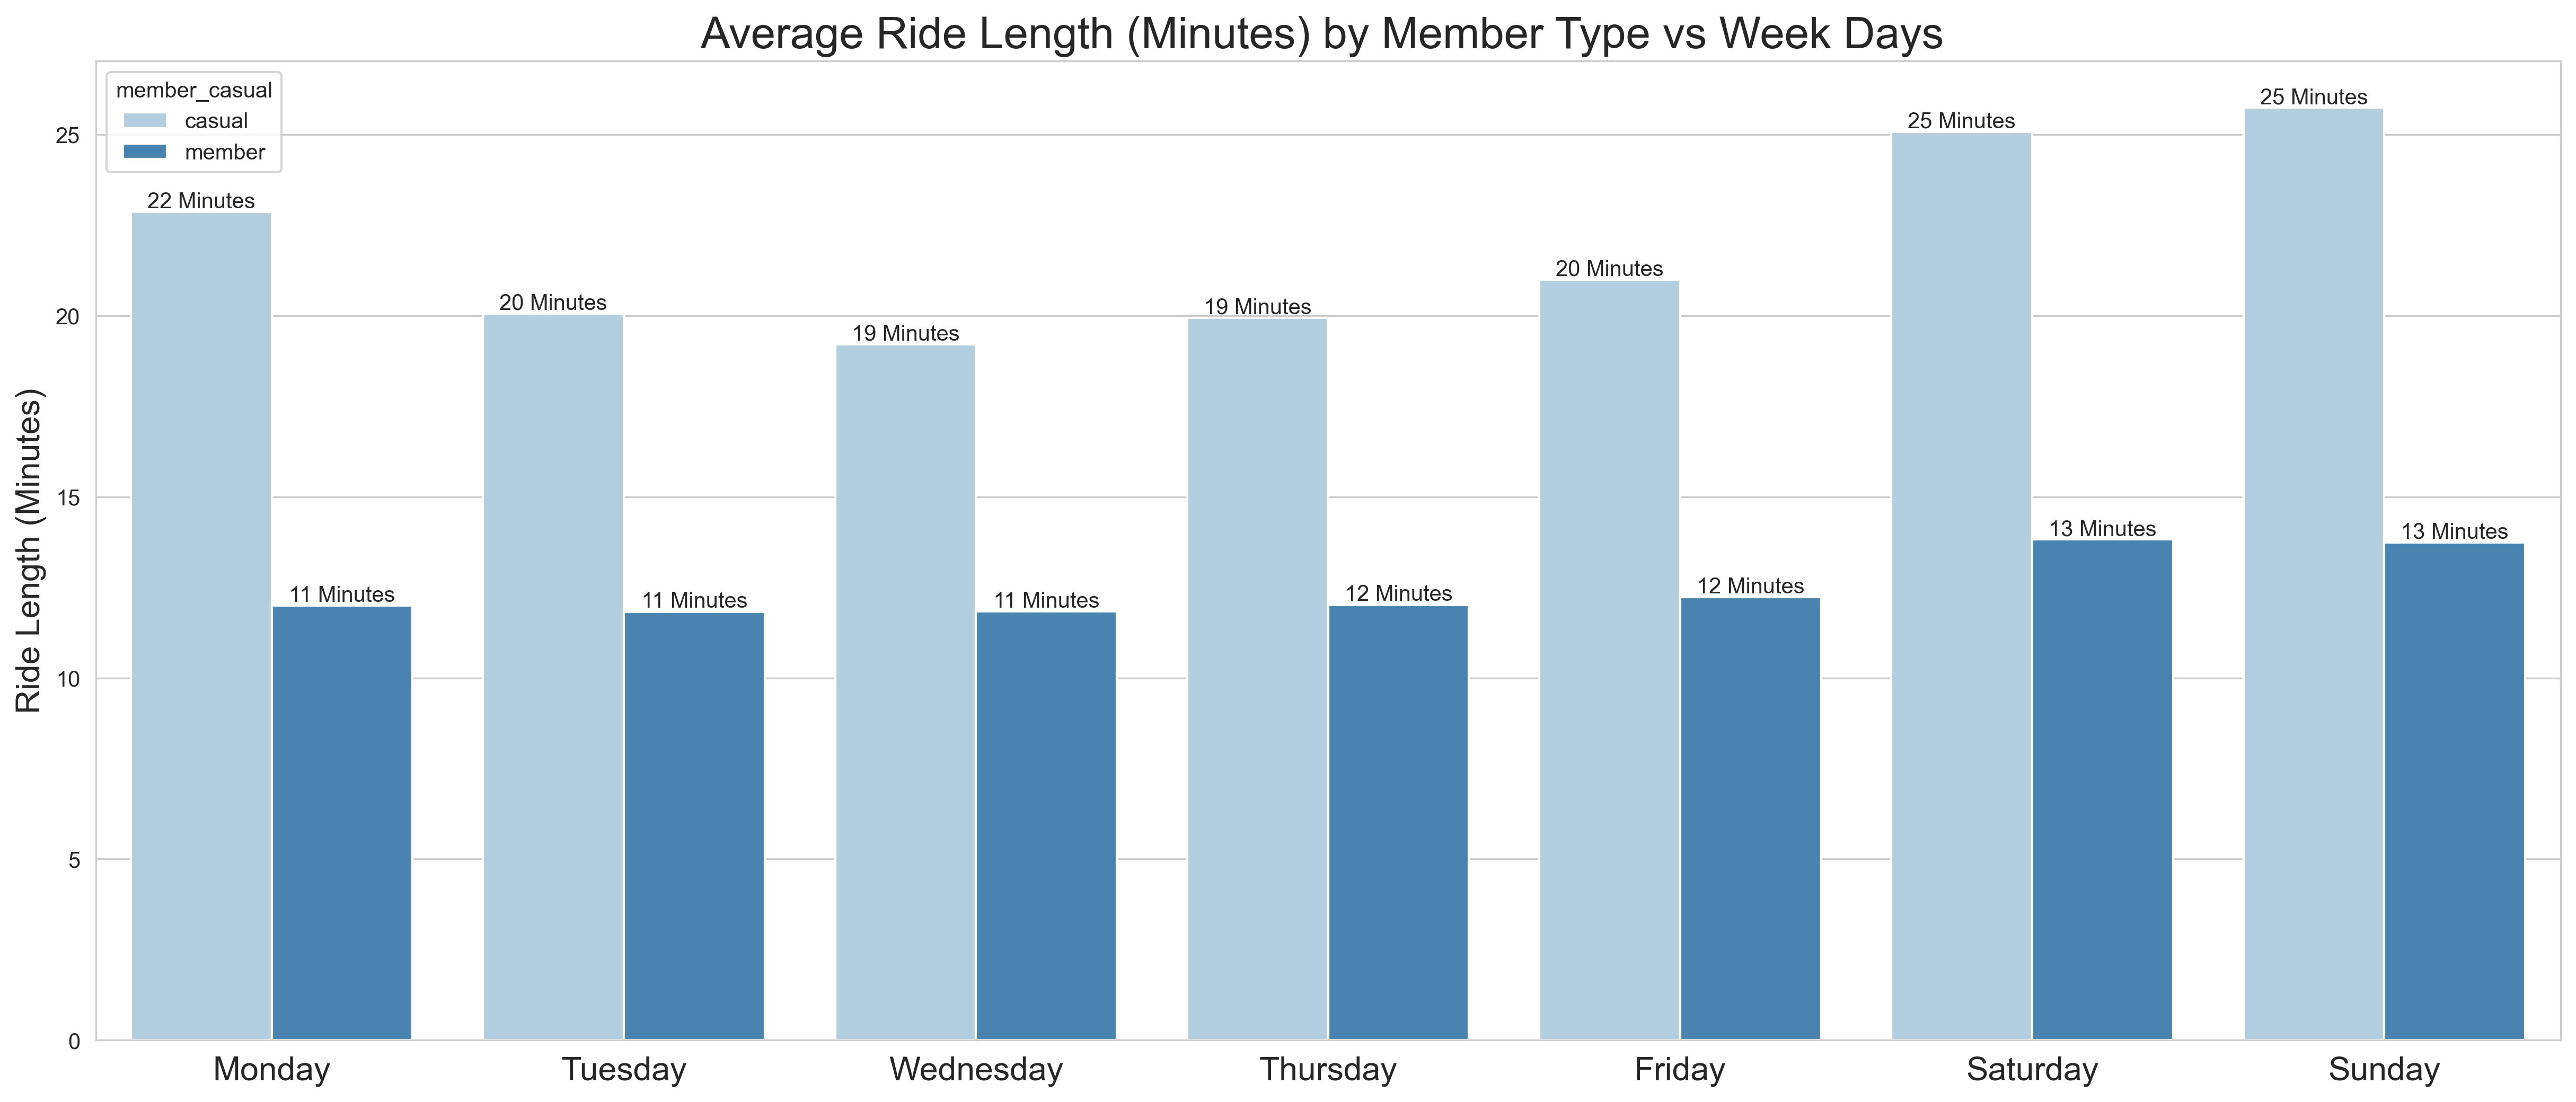

In [164]:
plt.figure(figsize=(20,8), dpi = 300)
plt.ticklabel_format(style='plain', axis='y')
data = data_2022.groupby(['member_casual', 'day']).agg('mean').reset_index()
data = data[['member_casual', 'day', 'ride_length']]
ax = sns.barplot(x = 'day', y = 'ride_length', data = data, hue = 'member_casual', palette=plot_color)
ax.set(xlabel=None)
[ax.bar_label(x, fmt = '%d Minutes', fontsize = 10) for x in ax.containers]
ticks = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
ax.set_ylabel(ylabel = 'Ride Length (Minutes)', fontsize = 15)
nx = ax.set_title(label = 'Average Ride Length (Minutes) by Member Type vs Week Days ', fontsize = 20)

* Average ride_length of Casual riders is 2x for each day compared to Member riders
* Average ride_length of Member riders is consistent throughout the week.
* Average ride_length of Casual riders is not consistent and peaks during the weekends.

# Share

### Guiding questions

* Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?

    - To some extent yes. Would have been far better if there was some kind of unique id for each riders.
    
    
* What story does your data tell?

    - Average ride_lengh of Casual riders is 2x than Member riders
    - Casual riders prefer classic and electric bike more than docked bike.
    - I did some calculations (which I will not share here) and I strongly believe that the Cyclistic earns more from casual riders than members. I may be wrong here though.
    
    
* How do your findings relate to your original question?

    - With the above analysis it is easy to identify the best months for marketing and test out some new strategy.
    
    
* Who is your audience? What is the best way to communicate with them?

    - Lily Moreno, Cyclistic marketing analytics team and Cyclistic executive team
    - Best way to communicate would be through the presentation or dashboard.
    
    
* Can data visualization help you share your findings?

    - Yes absolutely
    
    
* Is your presentation accessible to your audience?

    - Yes via Kaggle and Github

# Act

### Guiding questions

* What is your final conclusion based on your analysis?
    
    - Member riders are most likely the resident of chicago using the Cyclistic bike for daily commute and have a fixed schedule.
    - Casual riders use Cyclistic bikes as per their needs.
    - On an average casual members travel further than member riders.
    - Good marketing strategy during the months of June, July and August has a high chance of converting the casual riders to members.
    
    
* How could your team and business apply your insights?

    - As mentioned in the previous point, if the marketing team implement some nice strategy during the peak months then there is a high probability of converting the casual riders to annual members.
    
    
* What next steps would you or your stakeholders take based on your findings?

    - Highly depend on the marketing team/stakeholders.
    
    
* Is there additional data you could use to expand on your findings?
    
    - Earnings of the company by user type can be measured. Might need some extra digging and calculations.

# Thank you for taking the time to check my analysis &#x1F9E1;
Any feedback would be highly appreciated. Please be kind.